In [1]:
!pip install -q pandas
!pip install -q numpy
!pip install -q matplotlib
!pip install -q seaborn
!pip install -q plotly
!pip install -q sklearn
!pip install -q imblearn
!pip install -q xgboost
!pip install -q catboost
!pip install -q lightgbm
!pip install -q pandas_profiling

In [2]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#import squarify
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

import urllib, os, pickle
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing 
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler,LabelEncoder
from sklearn import compose
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.under_sampling import NearMiss
 ##Profiling
#import pandas_profiling
#from pandas_profiling import ProfileReport
# Models
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import *
import catboost  
import lightgbm  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import catboost  
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn import tree
from sklearn import linear_model 
from sklearn import svm 
from sklearn import neighbors 
from sklearn import ensemble 
from sklearn.dummy import DummyRegressor
from sklearn.base import clone
from sklearn.utils import all_estimators
# Setup reproductibility
np.random.seed(0)

In [3]:
#moounting and accessing my folder named 'file'
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/files

Mounted at /content/gdrive/
/content/gdrive/MyDrive/files


In [ ]:
#checking for files in my folder
for file in os.listdir():
  print(file)

# Data reading

In [5]:
Train = pd.read_csv('Train3.csv')
Test = pd.read_csv('Test3.csv')
submission = pd.read_csv('SampleSubmission1.csv')
variable= pd.read_csv('VariableDefinitions.csv')

In [6]:
# variable definitions
variable

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [7]:
Train

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.0,47.0,21602.0,7201.0,52.0,8835.0,3391.0,396.0,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.0,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.0,19.0,7896.0,2632.0,25.0,9385.0,27.0,46.0,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.0,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.0,21.0,12351.0,4117.0,29.0,9360.0,66.0,102.0,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,16,NaN,NaN,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.0,5.0,2500.0,833.0,5.0,0.0,15.0,77.0,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.0,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,3,NaN,NaN,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.0,1.0,600.0,200.0,1.0,591.0,11.0,37.0,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.0,0


In [8]:
Test

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,MATAM,I 18-21 month,2500.0,5.0,2500.0,833.0,5.0,0.0,64.0,70.0,NaN,NaN,NaN,NO,35,All-net 500F=2000F;5d,5.0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,5a4db591c953a8d8f373877fad37aaf4268899a1,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NO,22,NaN,NaN
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,SAINT-LOUIS,K > 24 month,5100.0,7.0,5637.0,1879.0,15.0,7783.0,30.0,24.0,0.0,0.0,NaN,NO,60,"Data:1000F=2GB,30d",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,DAKAR,F 9-12 month,500.0,1.0,506.0,169.0,1.0,0.0,26.0,NaN,NaN,6.0,NaN,NO,14,All-net 500F=2000F;5d,1.0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,DAKAR,K > 24 month,2000.0,4.0,2000.0,667.0,5.0,0.0,8.0,54.0,NaN,NaN,NaN,NO,29,All-net 500F =2000F_AllNet_Unlimited,3.0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,NaN,K > 24 month,300.0,2.0,298.0,99.0,2.0,0.0,1.0,2.0,NaN,NaN,NaN,NO,12,NaN,NaN


In [9]:
submission

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0
...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,0
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,0


# Exploring Data

##TRAIN DATA

In [10]:
#checking for Train misssing values in percentage
null_values=pd.isnull(Train).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Train.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values


,Missing Data,Percentage
Columns,,
ZONE2,1008230,93.612584
ZONE1,992126,92.117353
TIGO,644774,59.866261
DATA_VOLUME,529763,49.187669
FREQ_TOP_PACK,450895,41.864898
TOP_PACK,450895,41.864898
ORANGE,447144,41.516624
REGION,424337,39.399029
ON_NET,393174,36.505593


There are a lot of missing values which some of them would be filled with their mean

Those with missoing values above 50% will be dropped during the feature engineering

In [11]:
# Filling the Train numeric columns with the mean values
Train["MONTANT"].fillna((Train["MONTANT"].mean()), inplace=True)
Train["FREQUENCE_RECH"].fillna((Train["FREQUENCE_RECH"].mean()), inplace=True)
Train["ARPU_SEGMENT"].fillna((Train["ARPU_SEGMENT"].mean()), inplace=True)
Train["FREQUENCE"].fillna((Train["FREQUENCE"].mean()), inplace=True)
Train["DATA_VOLUME"].fillna((Train["DATA_VOLUME"].mean()), inplace=True)
Train["FREQ_TOP_PACK"].fillna((Train["FREQ_TOP_PACK"].mean()), inplace=True)
Train["REVENUE"].fillna((Train["REVENUE"].mean()), inplace=True)
Train["ORANGE"].fillna((Train["ORANGE"].mean()), inplace=True)
Train["ON_NET"].fillna((Train["ON_NET"].mean()), inplace=True)

In [12]:
# checking for Train misssing values in percentage
null_values=pd.isnull(Train).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Train.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,1008230,93.612584
ZONE1,992126,92.117353
TIGO,644774,59.866261
TOP_PACK,450895,41.864898
REGION,424337,39.399029
user_id,0,0.000000
ORANGE,0,0.000000
FREQ_TOP_PACK,0,0.000000
REGULARITY,0,0.000000


## TEST DATA

In [13]:
#checking for Test misssing values in percentage
#\\
null_values=pd.isnull(Test).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Test.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,178052,93.680516
ZONE1,175213,92.186801
TIGO,113508,59.721250
DATA_VOLUME,93347,49.113715
FREQ_TOP_PACK,79290,41.717746
TOP_PACK,79290,41.717746
ORANGE,78646,41.378911
REGION,74733,39.320120
ON_NET,69292,36.457385


There are a lot of missing values which some of them would be filled with their mean

Those with missoing values above 50% will be dropped

In [14]:
# Filling the Test numeric columns with the mean values
Test["MONTANT"].fillna((Train["MONTANT"].mean()), inplace=True)
Test["FREQUENCE_RECH"].fillna((Test["FREQUENCE_RECH"].mean()), inplace=True)
Test["ARPU_SEGMENT"].fillna((Test["ARPU_SEGMENT"].mean()), inplace=True)
Test["FREQUENCE"].fillna((Test["FREQUENCE"].mean()), inplace=True)
Test["DATA_VOLUME"].fillna((Test["DATA_VOLUME"].mean()), inplace=True)
Test["FREQ_TOP_PACK"].fillna((Test["FREQ_TOP_PACK"].mean()), inplace=True)
Test["REVENUE"].fillna((Test["REVENUE"].mean()), inplace=True)
Test["ORANGE"].fillna((Test["ORANGE"].mean()), inplace=True)
Test["ON_NET"].fillna((Test["ON_NET"].mean()), inplace=True)

In [15]:
#checking for Test misssing values in percentage
#\\
null_values=pd.isnull(Test).sum()
columns=null_values.index
frequency=null_values.values
percentage=(frequency/Test.shape[0])*100
missing_values=pd.DataFrame({'Columns':columns,'Missing Data':frequency,'Percentage':percentage}).sort_values('Percentage',ascending=False).set_index('Columns')
missing_values

,Missing Data,Percentage
Columns,,
ZONE2,178052,93.680516
ZONE1,175213,92.186801
TIGO,113508,59.721250
TOP_PACK,79290,41.717746
REGION,74733,39.320120
user_id,0,0.000000
REGULARITY,0,0.000000
MRG,0,0.000000
ORANGE,0,0.000000


# VISUALIZATIONS

In [16]:
#copying train data for visualization
df = Train.copy()
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.000000,0
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,3,NaN,9.262446,0
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,1,NaN,9.262446,0
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.000000,0
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,16,NaN,9.262446,0
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.000000,0
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,3,NaN,9.262446,1
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.000000,0


In [17]:
# replacing 0 with 'Yes'
df['CHURN']= df['CHURN'].replace(0,'No')
df['CHURN']= df['CHURN'].replace(1,'Yes')
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,7ee9e11e342e27c70455960acc80d3f91c1286d1,DAKAR,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,185.0,NaN,NaN,NO,62,On net 200F=Unlimited _call24H,30.000000,No
1,50443f42bdc92b10388fc56e520e4421a5fa655c,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,3,NaN,9.262446,No
2,da90b5c1a9b204c186079f89969aa01cb03c91b2,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,1,NaN,9.262446,No
3,364ec1b424cdc64c25441a444a16930289a0051e,SAINT-LOUIS,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,20.0,NaN,2.0,NO,61,"Data:490F=1GB,7d",7.000000,No
4,d5a5247005bc6d41d3d99f4ef312ebb5f640f2cb,DAKAR,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,34.0,NaN,NaN,NO,56,All-net 500F=2000F;5d,11.000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,56e22fe3312a48cf860b043a021dab275383a20a,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,16,NaN,9.262446,No
1077020,587b72930e4d36b3fb94a18c3ef65c2079460eee,TAMBACOUNDA,K > 24 month,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,NaN,NaN,NaN,NO,34,All-net 500F=2000F;5d,2.000000,No
1077021,d6831b8edacb7d9928b3f053fb1283574577ae42,NaN,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,NaN,NaN,NaN,NO,3,NaN,9.262446,Yes
1077022,cb1f6510b084173c0deae49095f35ac29f916701,NaN,K > 24 month,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,5.0,1.0,NaN,NO,16,All-net 600F= 3000F ;5d,1.000000,No


### What is the total percentage/ number of those who churn?

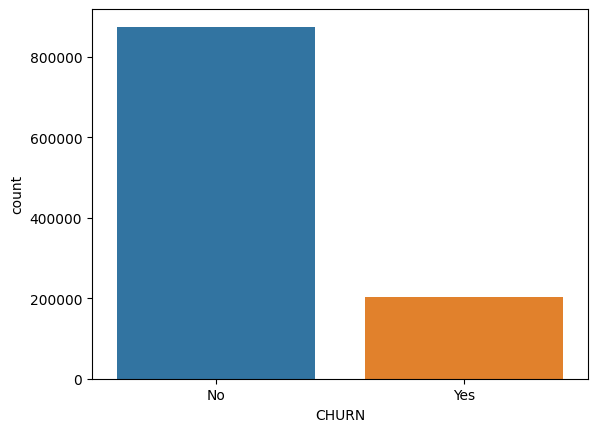

In [18]:
#churn count
sns.countplot(data=df, x='CHURN')

#Churn percentage
fig1 = go.Figure(
    data=go.Pie(values=df['CHURN'].value_counts().values,labels=df['CHURN'].value_counts().index,title='percentage of those who churn'))
fig1.show()
plt.show()
rcParams['figure.figsize'] = 15,8

#plt.tight_layout

We are having those who don't churn to have a percentage of 18.8(201,993) and those who churn to be 81.2(875,031)...which means our data is not balanced

In [19]:
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'TENURE', hue = 'CHURN')
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()

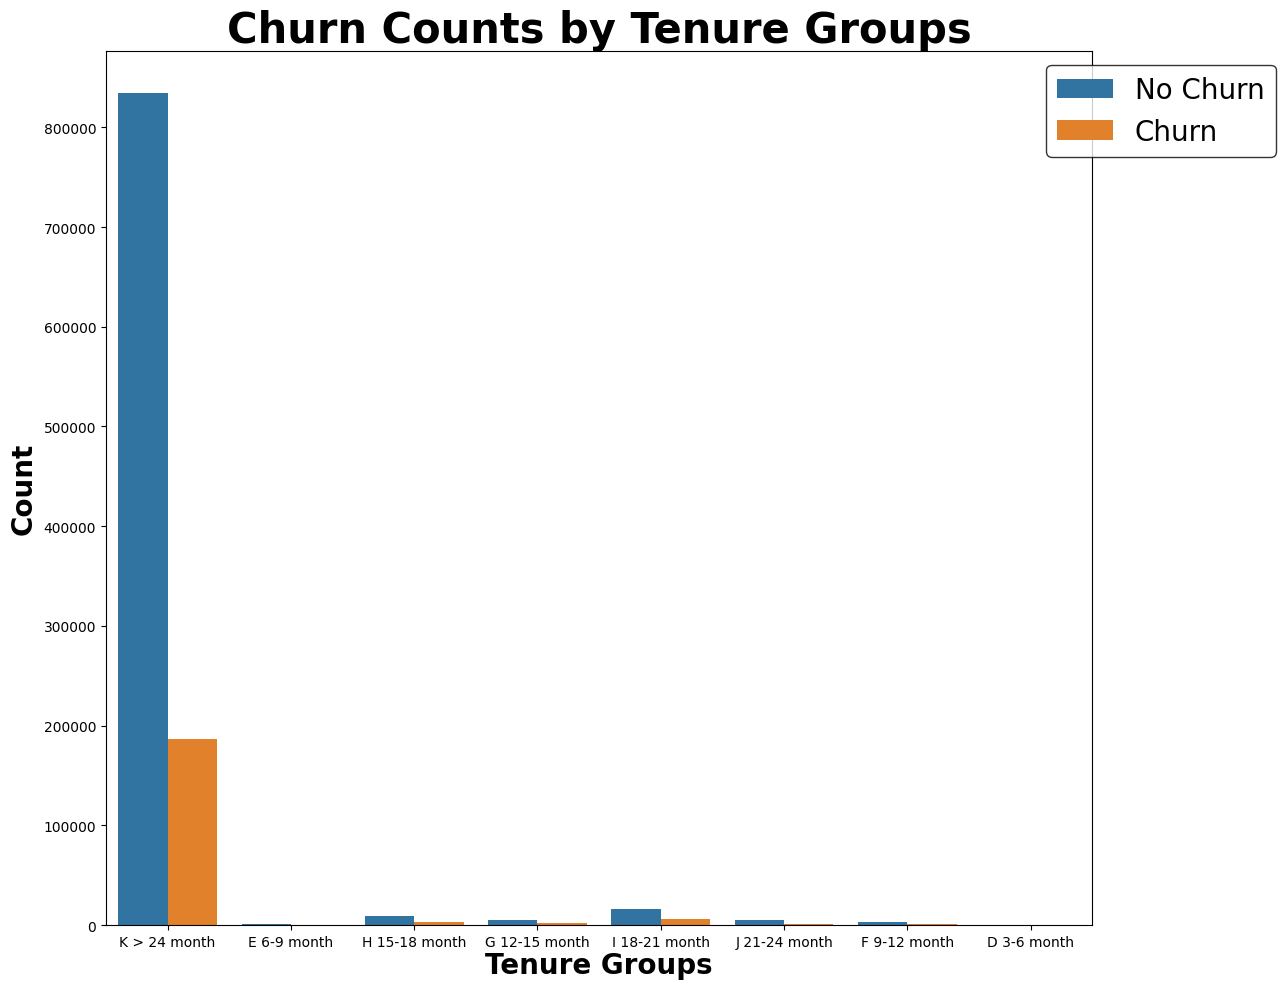

In [20]:
tenure_group_counts(df)

**Customers with shorter service tenures (newer clients) are more likely to churn than those with longer tenures....so most of the people who left service had less tenure**



In [21]:
def plot_montant_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'MONTANT', hue = 'CHURN')
    b.set_ylabel(f' ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average MONTANT by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()



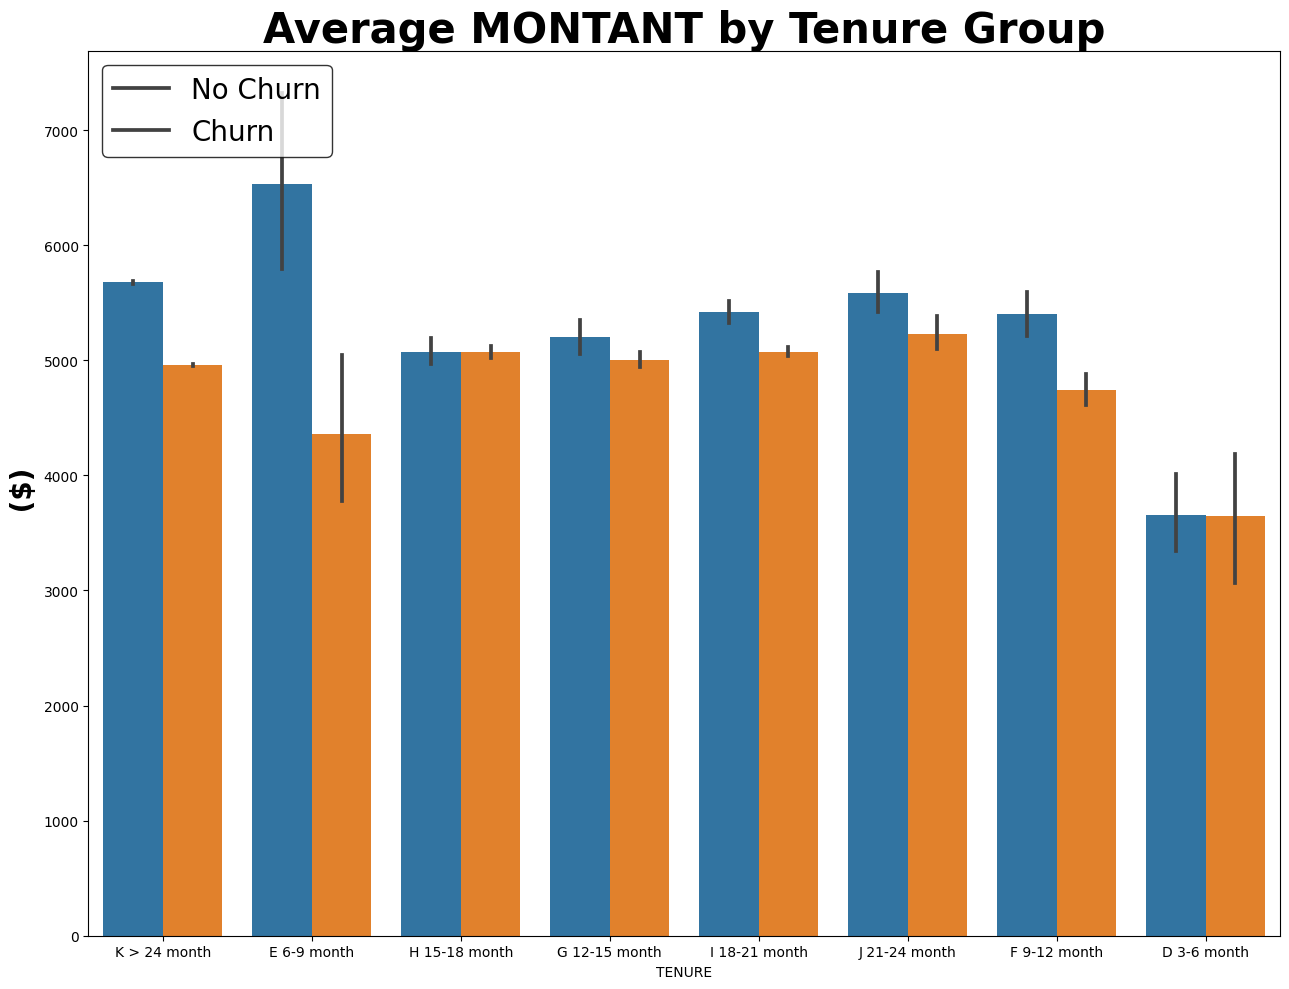

In [22]:
plot_montant_averages(df)

**Those who have been staying with the company between 6-9 months Churn most, and they are also the people with high top-up-amount**

In [23]:
def plot_revenue_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'REVENUE', hue = 'CHURN')
    b.set_ylabel(f' REVENUE ($)', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average REVENUE by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()

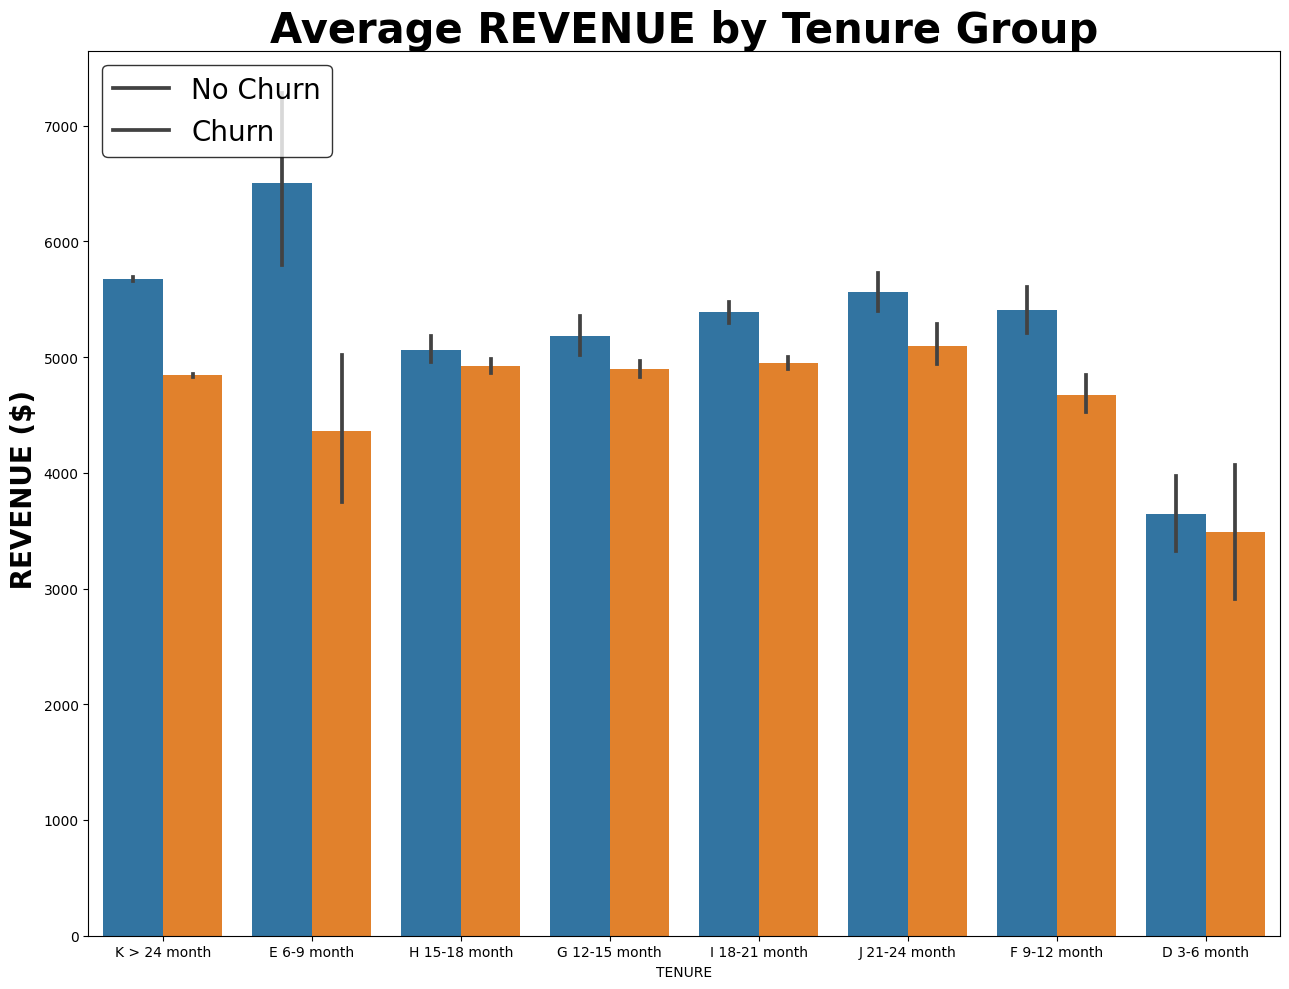

In [24]:
plot_revenue_averages(df)

**INTERESTING! Tenure group between 6-9 months are those with highh revenue. No wonder their top-up-amount is also high...They are those who churn most also**

In [25]:

def plot_refilled_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'TENURE', y = 'FREQUENCE_RECH', hue = 'CHURN')
    b.set_ylabel(f' Times the customer refilled ', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average times the customer refilled by Tenure Group', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left',labels = ['No Churn', 'Churn'], edgecolor = 'black')
    plt.tight_layout()

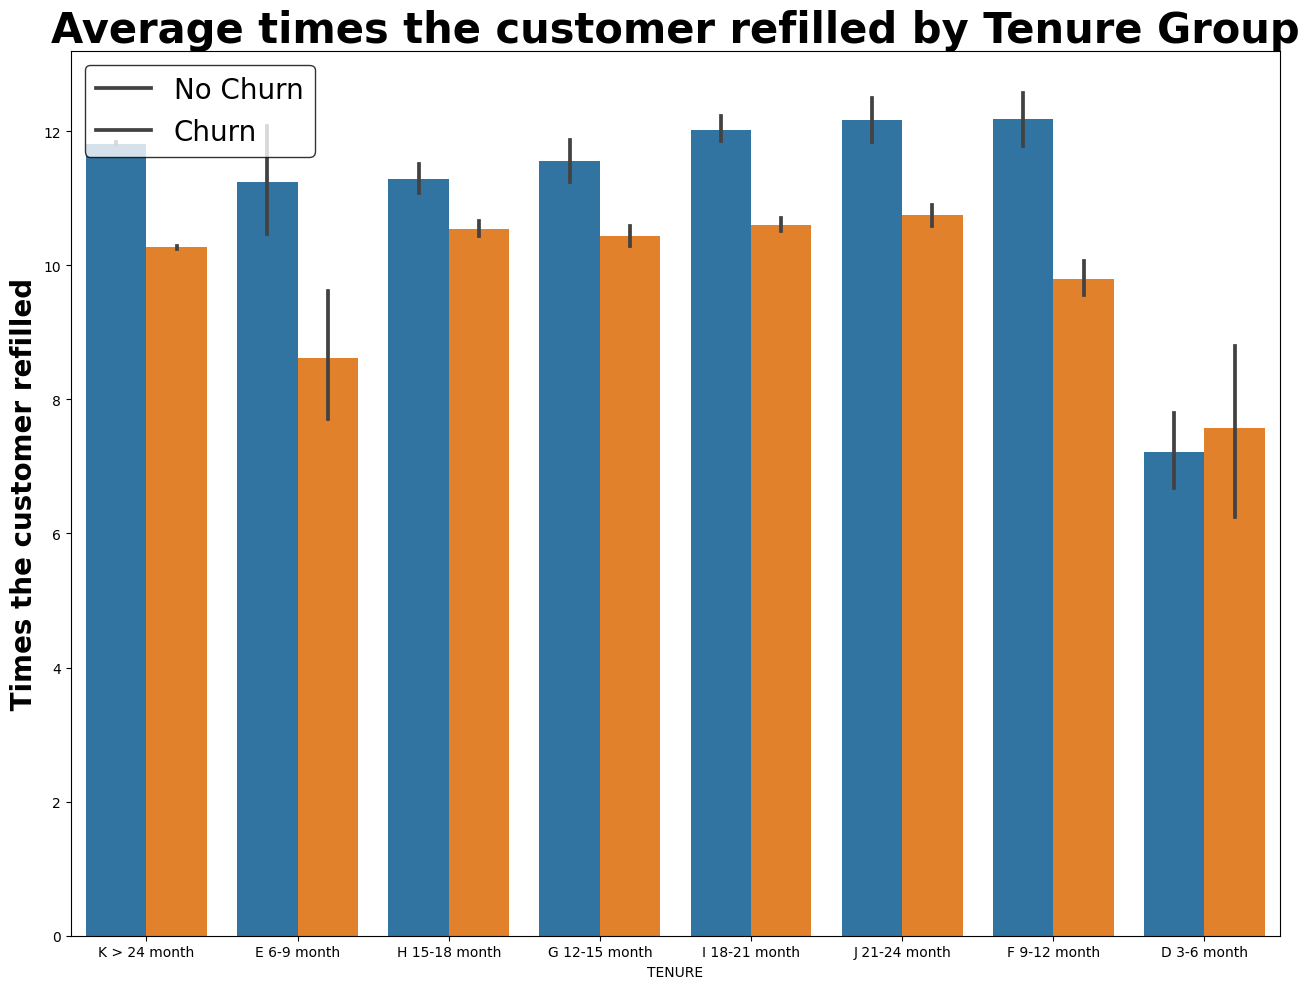

In [26]:
plot_refilled_averages(df)

**Those with Tenure between 9-12 refilled frequently with respect to those who don't churn** 

In [27]:
def plot_re_mon_averages(df):
    fig = plt.figure(figsize = (13, 10))
    b = sns.barplot(data = df, x = 'REGION', y = 'REVENUE', hue = 'CHURN')
    b.set_ylabel(f' REVENUE ', fontsize = 20, fontweight = 'bold')
    b.set_title(f'Average REVENUE by REGION', fontsize = 30, fontweight = 'bold')
    b.legend(fontsize = 20, loc = 'upper left', edgecolor = 'black')
    plt.tight_layout()

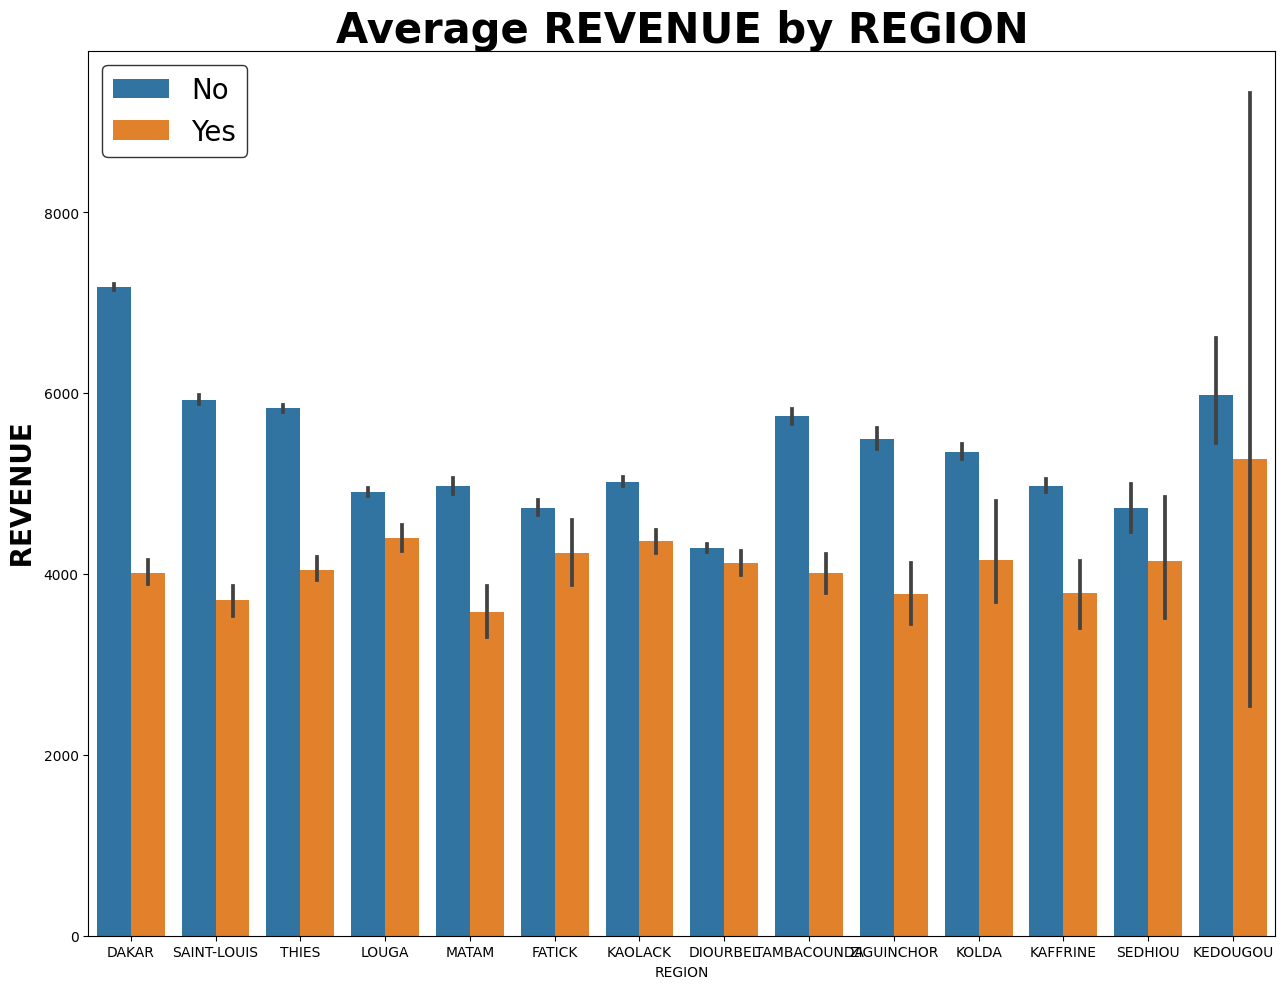

In [28]:
plot_re_mon_averages(df)

**The highest Revenue is coming from DAKAR with respect to those who don't churn...And respect to those who churn, the highest Revenue is coming from KEDOUGOU**

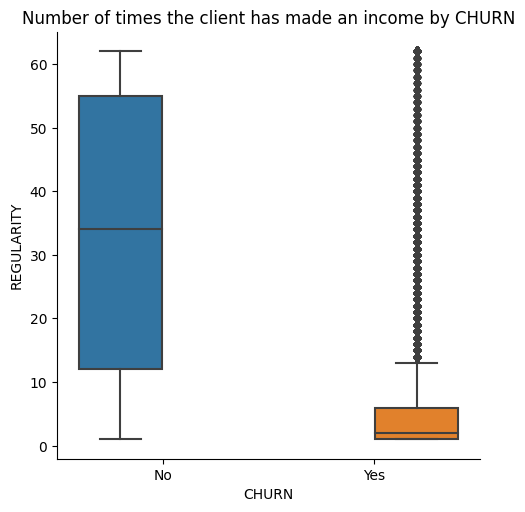

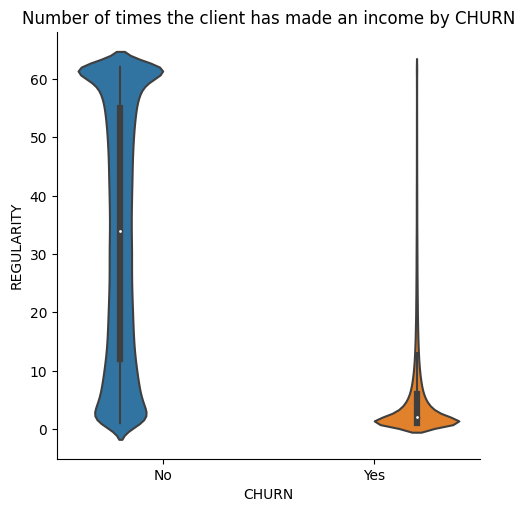

In [29]:
sns.catplot(data= df, x='CHURN',y='REGULARITY',kind='box', hue='CHURN').set(title='Number of times the client has made an income by CHURN')
sns.catplot(data= df, x='CHURN',y='REGULARITY',kind='violin', hue='CHURN').set(title='Number of times the client has made an income by CHURN')

**It can be seen that client churn when the Number of times a he or she  has made an income is between 0-10**

# FEATURE ENGINEERING

## Dropping unwanted features


In [30]:
Train.drop(columns=['user_id','REGION', 'MRG', 'TOP_PACK','TIGO','ZONE1','ZONE2'], inplace=True) 
Test.drop(columns=['user_id','REGION', 'MRG', 'TOP_PACK','TIGO','ZONE1','ZONE2'], inplace=True)

In [31]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077024 entries, 0 to 1077023
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   TENURE          1077024 non-null  object 
 1   MONTANT         1077024 non-null  float64
 2   FREQUENCE_RECH  1077024 non-null  float64
 3   REVENUE         1077024 non-null  float64
 4   ARPU_SEGMENT    1077024 non-null  float64
 5   FREQUENCE       1077024 non-null  float64
 6   DATA_VOLUME     1077024 non-null  float64
 7   ON_NET          1077024 non-null  float64
 8   ORANGE          1077024 non-null  float64
 9   REGULARITY      1077024 non-null  int64  
 10  FREQ_TOP_PACK   1077024 non-null  float64
 11  CHURN           1077024 non-null  int64  
dtypes: float64(9), int64(2), object(1)
memory usage: 98.6+ MB


# 1st Approach - Unbalanced dataset

### Defining variables for the columns in the dataframe to perform a train test split.

In [32]:
num_cols = Train.select_dtypes(include=np.number).columns.tolist()
cat_cols = Train.select_dtypes(exclude=np.number).columns.tolist()

print( f"Numeric features : {len(num_cols)}" )
print( f"Categorical features : {len(cat_cols)}" )

Numeric features : 11
Categorical features : 1


In [33]:
columns = ['TENURE','MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
numerical_columns = ['MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
categorical_columns = ['TENURE']

### Splitting Data into Predictor and Response Variable

In [34]:
X = Train.drop(['CHURN'], axis=1)
y = Train.CHURN

### Splitting Data into Train and Test data

In [35]:
X_train, X_eval, y_train, y_eval = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)
(X_train.shape, y_train.shape) , ( X_eval.shape,  y_eval.shape)

(((861619, 11), (861619,)), ((215405, 11), (215405,)))

In [36]:
 # Pipeline for the Numeric features 
num_transformer = Pipeline(
     steps=[("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())]
 )

 # Pipeline for the Categorical features
encoder_categories = [ Train[categorical_columns[i] ].append( Test[categorical_columns[i] ] ).dropna().unique() for i in range(len(categorical_columns)) ]

cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", preprocessing.OneHotEncoder(categories=encoder_categories, drop="first", sparse=False)) #if_binary
            
            ])

 # Associate the two pipelines
preprocessor = ColumnTransformer(
     transformers=[
         ("num", num_transformer, selector(dtype_include="number")),
         ("cat", cat_transformer, selector(dtype_exclude="number")),
        
     ]
 )
X_train__, X_eval__ = preprocessor.fit_transform(X_train), preprocessor.transform(X_eval)
 # New categorical feature names
feature_names_out = preprocessor.named_transformers_['cat'][-1].get_feature_names_out().tolist()
indexes = [ int(feature_names_out[i][1:feature_names_out[i].find("_")]) for i in range(len(feature_names_out))]
cat_cols_encoded = [  col.replace( f"x{i}", categorical_columns[i] )  for col,i in zip(feature_names_out, indexes)]

 # train df
df_X_train = pd.DataFrame(X_train__, columns=numerical_columns+cat_cols_encoded)

 # eval df
df_X_eval = pd.DataFrame(X_eval__, columns=numerical_columns+cat_cols_encoded)





In [37]:
df_X_train.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,TENURE_E 6-9 month,TENURE_H 15-18 month,TENURE_G 12-15 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_F 9-12 month,TENURE_D 3-6 month
0,-0.000128,-0.000091,-0.000050,-0.000050,-0.000316,0.000073,0.000259,-0.000677,-1.124118,-0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.040098,0.138047,-0.034927,-0.035101,0.252470,0.546240,0.000259,-0.584709,-1.124118,-0.242037,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.877145,-0.984836,-0.855702,-0.855535,-1.084329,-0.352972,-0.383364,-0.565490,-0.630643,-0.883324,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.092414,-0.236247,-0.086546,-0.086378,-0.415930,0.000073,0.003038,-0.386104,0.894642,-0.242037,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.000128,-0.000091,-0.937745,-0.937579,-1.084329,0.000073,0.000259,-0.610336,-1.213840,-0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_X_eval.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,TENURE_E 6-9 month,TENURE_H 15-18 month,TENURE_G 12-15 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_F 9-12 month,TENURE_D 3-6 month
0,-0.929460,-0.984836,-0.000050,-0.000050,-0.000316,0.000073,0.000259,-0.000677,-1.213840,-0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.000128,-0.000091,-0.000050,-0.000050,-0.000316,0.000073,0.000259,-0.000677,-1.168979,-0.000225,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.738625,0.793061,1.536886,1.537056,1.255069,0.000073,0.050440,0.081579,1.477839,1.468059,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.755075,-0.516968,-0.735885,-0.736060,0.252470,0.000073,-0.380491,-0.584709,0.670335,-0.883324,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.423745,-0.236247,-0.411643,-0.411475,-0.332380,0.000073,-0.295741,-0.296412,0.760058,-0.562681,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Building

In [39]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)
ada = AdaBoostClassifier(random_state = 24)
# Create a dictionary of the models
unbalancedDt_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model,
    "ada_boost": ada

}

In [40]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, df_X_train= df_X_train, X_eval= X_eval, 
                                 y_train= y_train, y_eval= y_eval):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(df_X_train, y_train)

        # making predictions
        y_pred = model.predict(df_X_eval)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_eval, y_pred),
        recall_score(y_eval, y_pred),
        f1_score(y_eval, y_pred),
        accuracy_score(y_eval, y_pred),
        roc_auc_score(y_eval, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_eval, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_eval, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_eval, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_eval, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        
        print(f"{name} AUC score: {roc_auc_score(y_eval, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91    175006
           1       0.63      0.60      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.77      0.76      0.76    215405
weighted avg       0.85      0.86      0.86    215405
 

Logistic Regressor Confusion Matrix: 
         0      1
0  160614  14392
1   16350  24049 



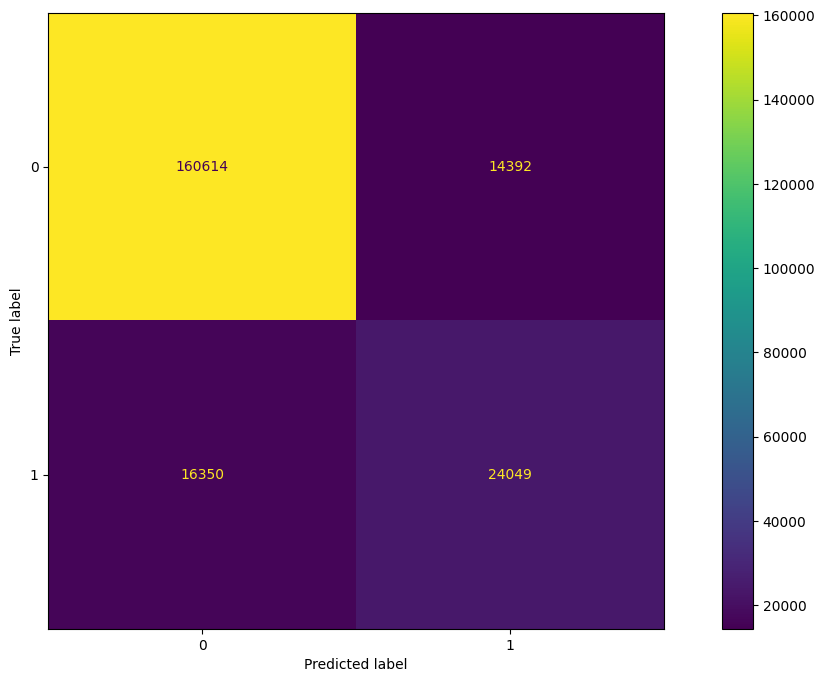

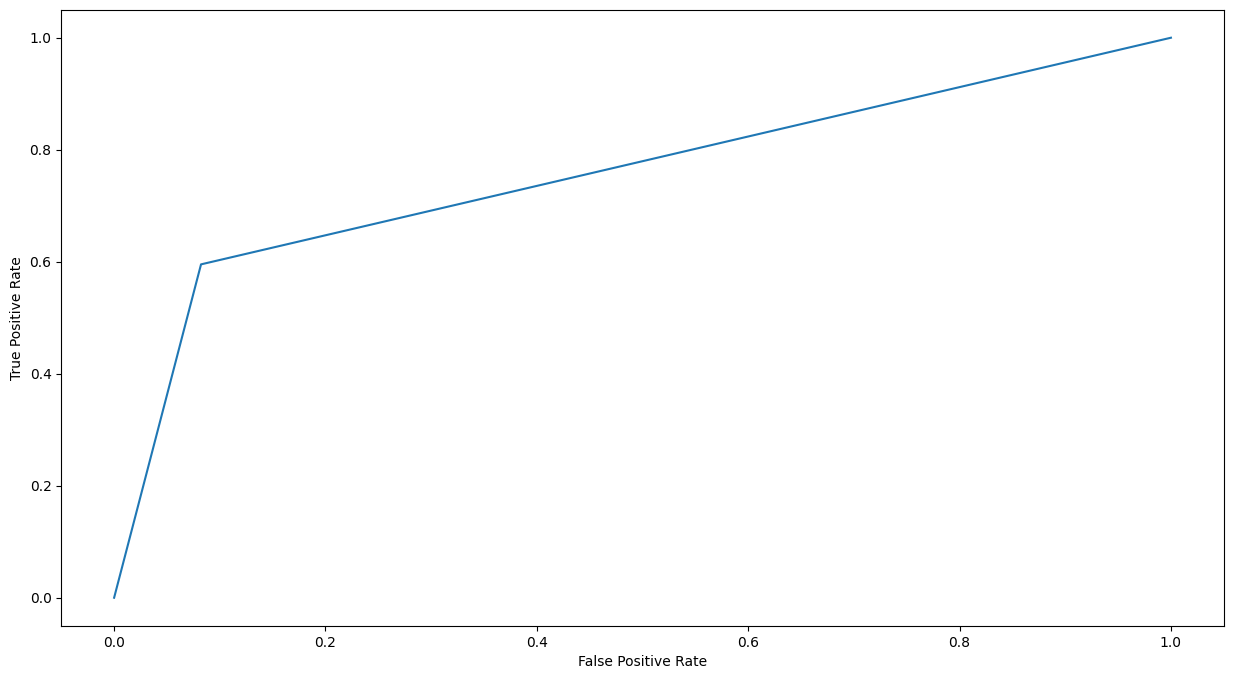



Logistic Regressor AUC score: 0.7565249158076132


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90    175006
           1       0.57      0.59      0.58     40399

    accuracy                           0.84    215405
   macro avg       0.74      0.74      0.74    215405
weighted avg       0.84      0.84      0.84    215405
 

Decision Tree Confusion Matrix: 
         0      1
0  157061  17945
1   16658  23741 



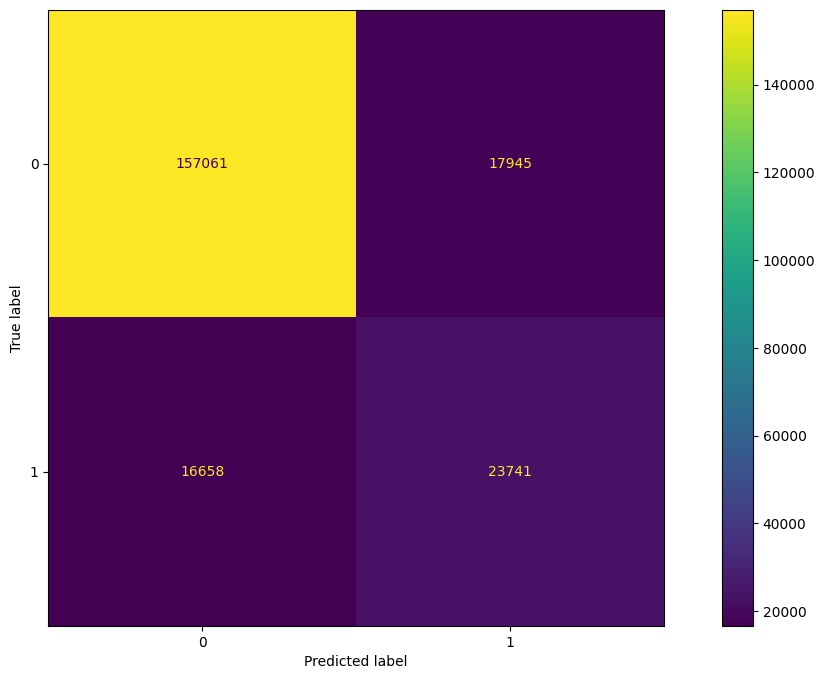

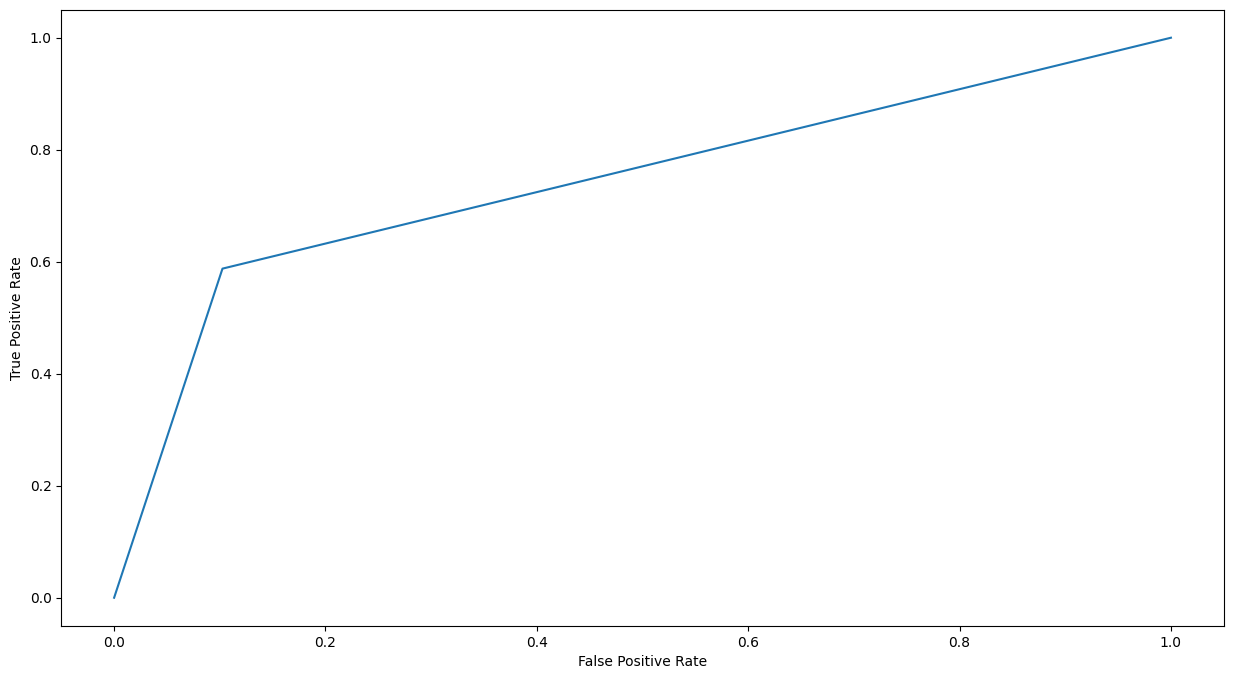



Decision Tree AUC score: 0.7425618597292822


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92    175006
           1       0.65      0.57      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.78      0.75      0.76    215405
weighted avg       0.86      0.86      0.86    215405
 

Random Forest Confusion Matrix: 
         0      1
0  162556  12450
1   17456  22943 



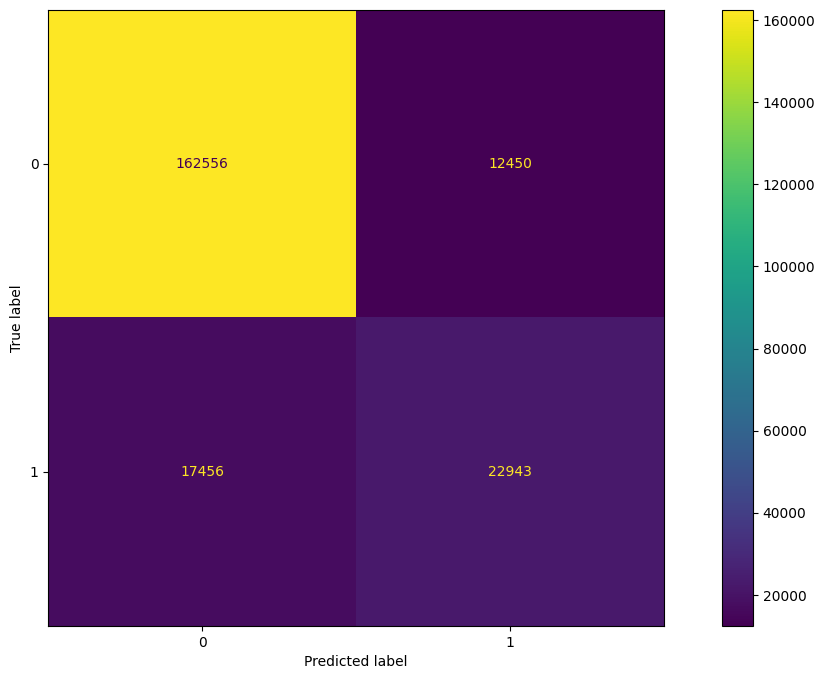

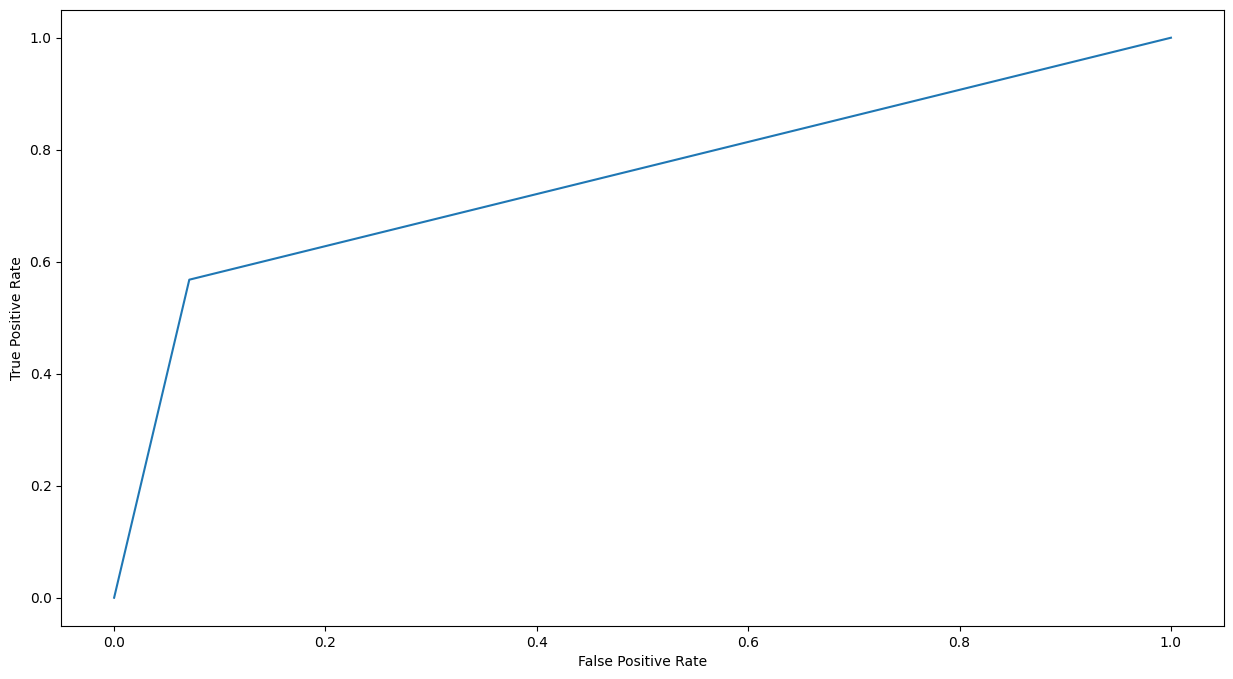



Random Forest AUC score: 0.748384839370882


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.55      0.61     40399

    accuracy                           0.87    215405
   macro avg       0.79      0.75      0.76    215405
weighted avg       0.86      0.87      0.86    215405
 

XGBoost Confusion Matrix: 
         0      1
0  164047  10959
1   18034  22365 



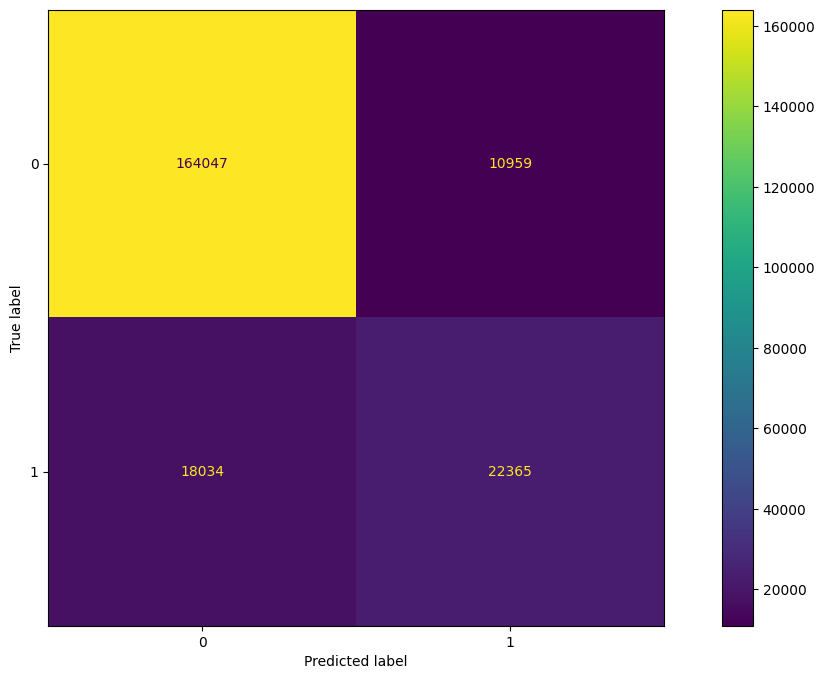

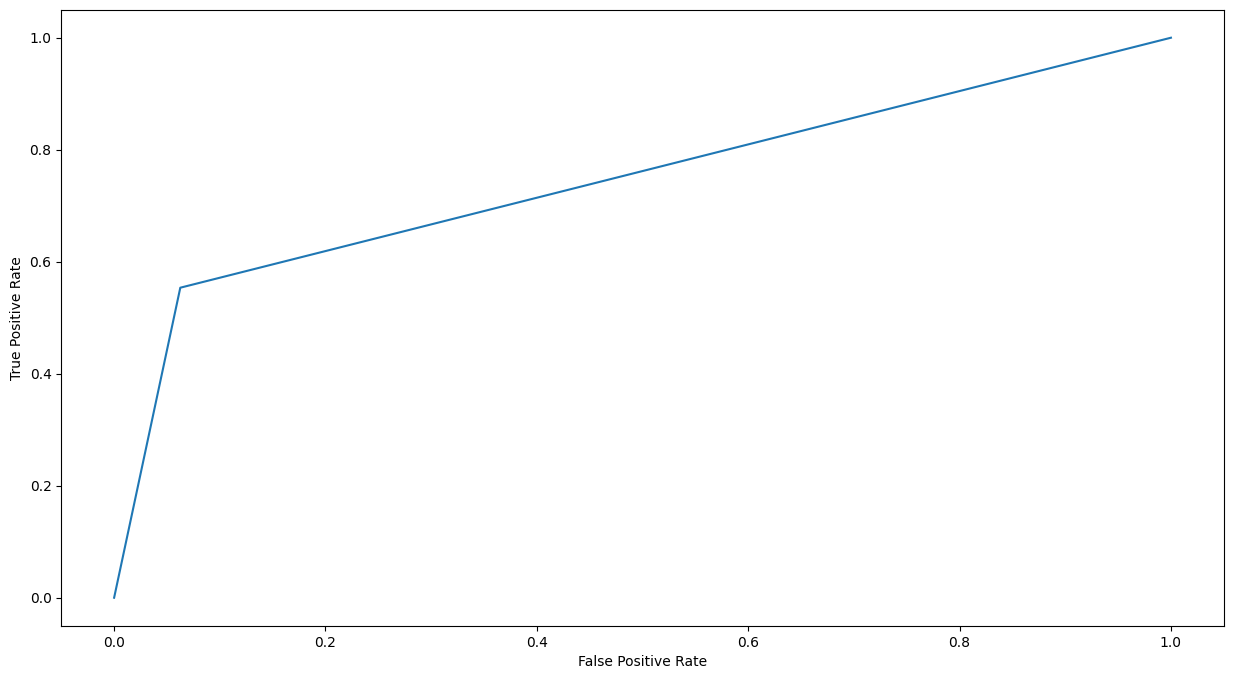



XGBoost AUC score: 0.7454910509018551


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.184635
0:	learn: 0.5207519	total: 250ms	remaining: 4m 9s
100:	learn: 0.2937101	total: 22s	remaining: 3m 15s
200:	learn: 0.2924477	total: 45.5s	remaining: 3m 1s
300:	learn: 0.2914954	total: 1m 8s	remaining: 2m 39s
400:	learn: 0.2906431	total: 1m 30s	remaining: 2m 14s
500:	learn: 0.2898954	total: 1m 55s	remaining: 1m 54s
600:	learn: 0.2891782	total: 2m 16s	remaining: 1m 30s
700:	learn: 0.2885192	total: 2m 41s	remaining: 1m 8s
800:	learn: 0.2879182	total: 3m 3s	remaining: 45.5s
900:	learn: 0.2873025	total: 3m 25s	remaining: 22.6s
999:	learn: 0.2867180	total: 3m 49s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.56      0.61     40399

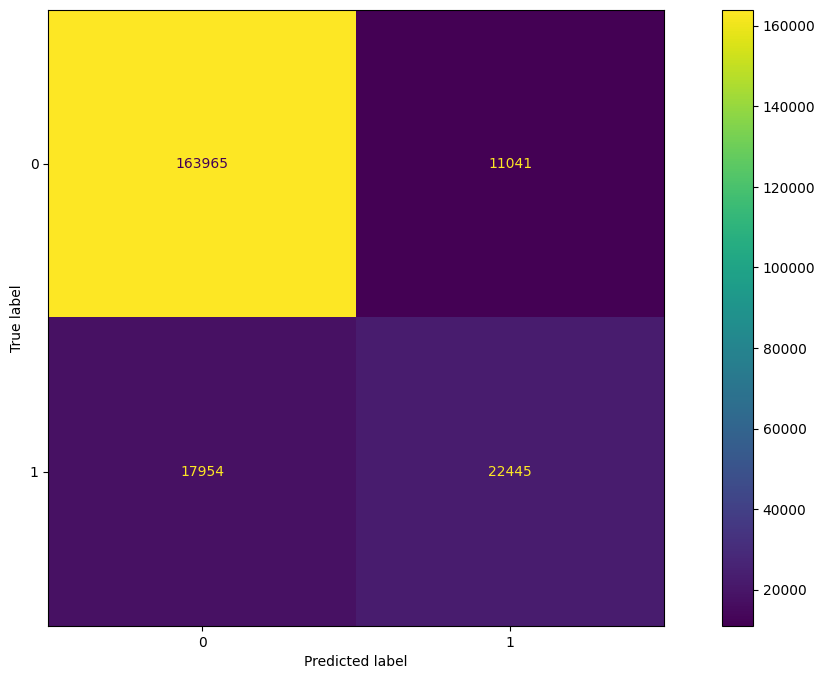

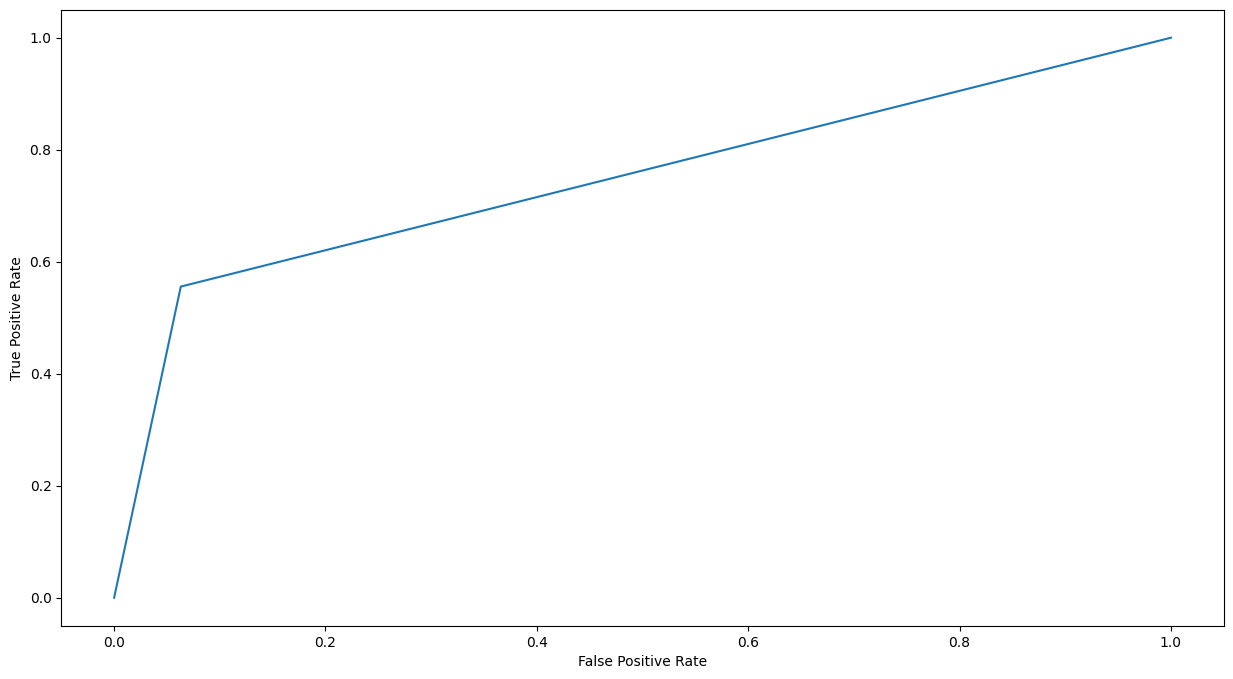



CatBoost AUC score: 0.7462468967378558


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.94      0.92    175006
           1       0.67      0.55      0.61     40399

    accuracy                           0.87    215405
   macro avg       0.79      0.74      0.76    215405
weighted avg       0.86      0.87      0.86    215405
 

LightGBM Confusion Matrix: 
         0      1
0  164212  10794
1   18194  22205 



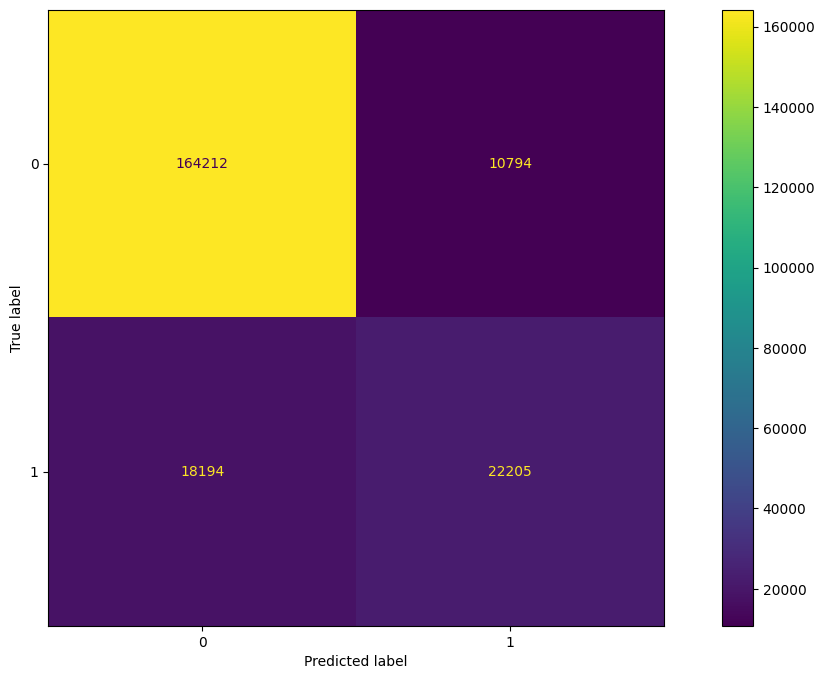

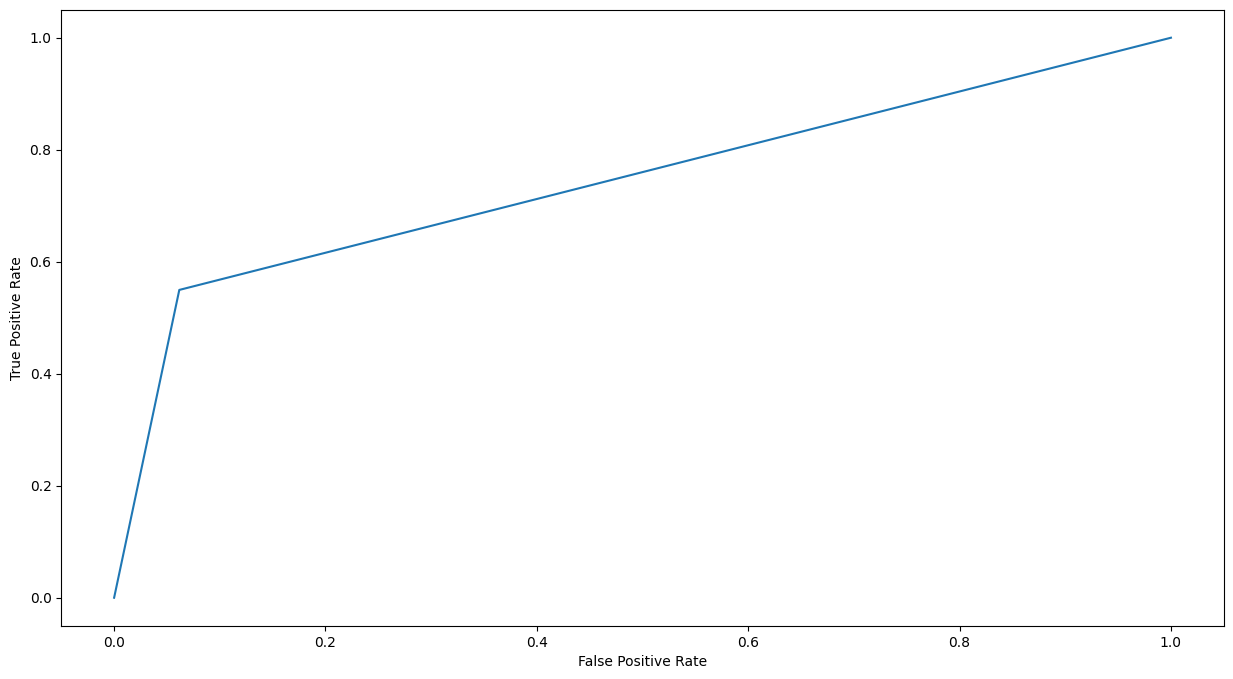



LightGBM AUC score: 0.7439822162747548


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


ada_boost Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.93      0.92    175006
           1       0.65      0.57      0.61     40399

    accuracy                           0.86    215405
   macro avg       0.78      0.75      0.76    215405
weighted avg       0.86      0.86      0.86    215405
 

ada_boost Confusion Matrix: 
         0      1
0  162738  12268
1   17332  23067 



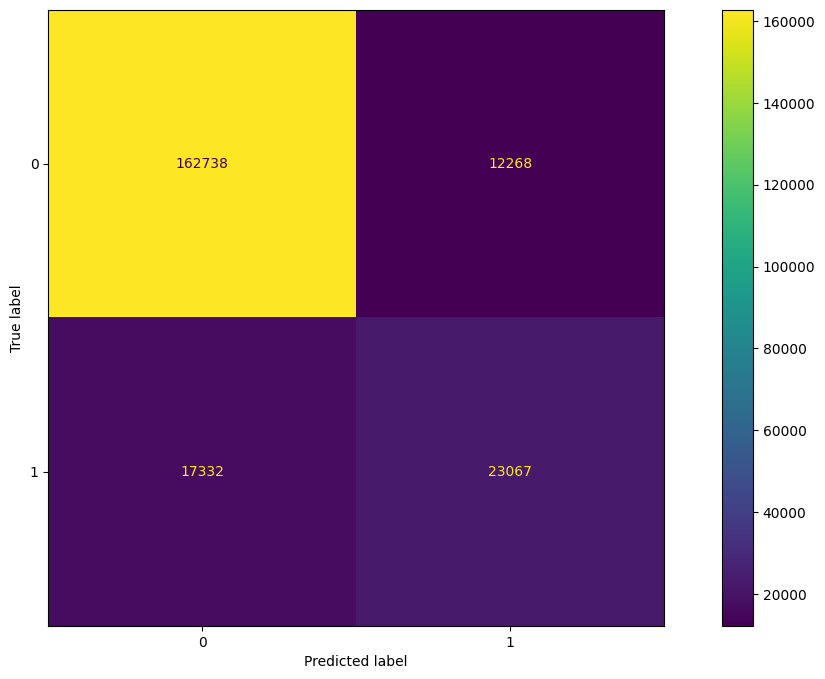

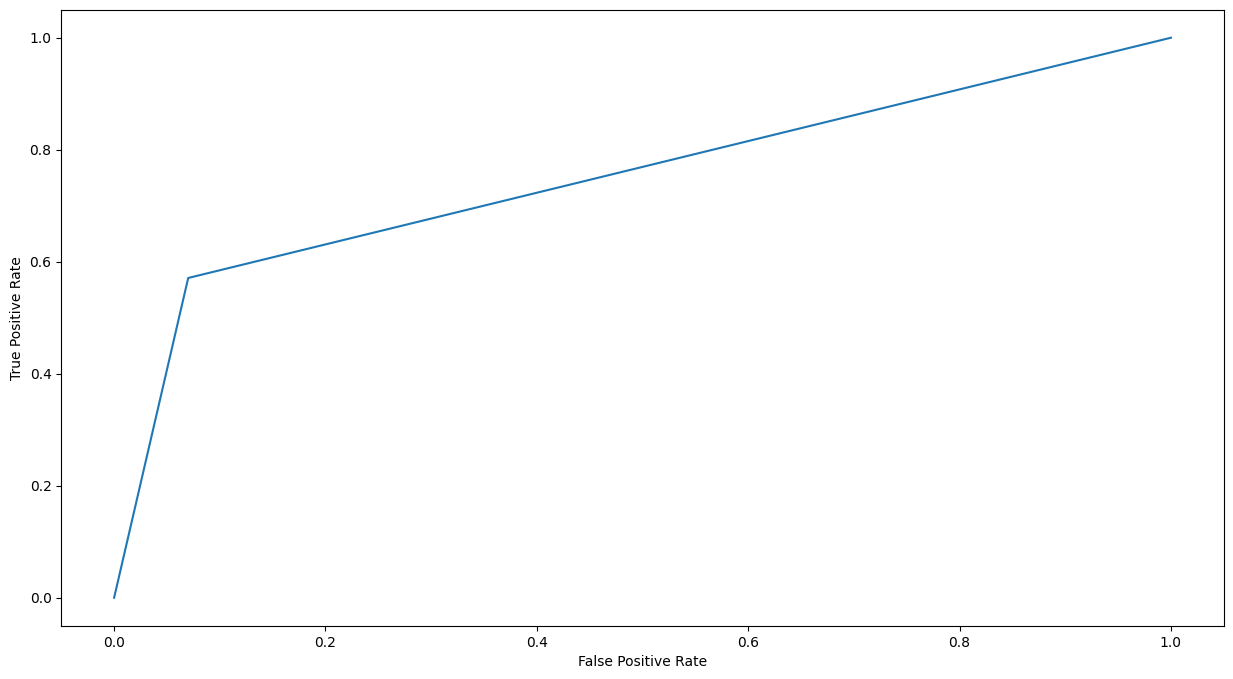



ada_boost AUC score: 0.7504395129956806


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
Logistic Regressor,0.625608,0.595287,0.610071,0.857283,0.756525
ada_boost,0.652809,0.570979,0.609158,0.862584,0.750440
Random Forest,0.648236,0.567910,0.605420,0.861164,0.748385
CatBoost,0.670280,0.555583,0.607566,0.865393,0.746247
XGBoost,0.671138,0.553603,0.606731,0.865402,0.745491
LightGBM,0.672899,0.549642,0.605057,0.865426,0.743982
Decision Tree,0.569520,0.587663,0.578449,0.839358,0.742562


In [41]:
# Fit and evaluate the models
from sklearn import metrics
from sklearn.metrics import *
model_performances = classification_fit_and_score(unbalancedDt_models)
model_performances

With our model building on the unbalanced dataset, Logistic Regression performed bestb with a AUC score of 0.756525

#Pipeline for the chosen model

In [42]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor), ("estimator", log_reg_model)]
)

# 2nd Approach- Balancing of Data

In [57]:
#copying train dataset
train = Train.copy()
train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN
0,K > 24 month,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,62,30.000000,0
1,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,3,9.262446,0
2,K > 24 month,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,1,9.262446,0
3,K > 24 month,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,61,7.000000,0
4,K > 24 month,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,56,11.000000,0


In [44]:
#copying test dataset
test = Test.copy()
test.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK
0,I 18-21 month,2500.000000,5.00000,2500.000000,833.000000,5.00000,0.000000,64.000000,70.000000,35,5.000000
1,K > 24 month,5529.210895,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,2,9.234326
2,K > 24 month,5529.210895,11.48394,5486.233417,1828.750281,13.93967,0.000000,281.210613,94.611639,22,9.234326
3,K > 24 month,5529.210895,11.48394,5486.233417,1828.750281,13.93967,3358.421151,281.210613,94.611639,6,9.234326
4,K > 24 month,5100.000000,7.00000,5637.000000,1879.000000,15.00000,7783.000000,30.000000,24.000000,60,4.000000


# Encoding

In [45]:
# Encode the TENURE column using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='error')
  

In [46]:
#categorical encoding

train_encoding =  pd.DataFrame(ohe.fit_transform(train[['TENURE']]))
train_encoding.columns = ohe.get_feature_names_out(['TENURE'])
train.drop(['TENURE'] ,axis=1, inplace=True)
train_encoding=pd.DataFrame(train_encoding)


train_data= pd.concat([train, train_encoding ], axis=1)

train_data

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,20000.000000,47.000000,21602.000000,7201.000000,52.000000,8835.000000,3391.000000,396.000000,62,30.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,3,9.262446,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,1,9.262446,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,7900.000000,19.000000,7896.000000,2632.000000,25.000000,9385.000000,27.000000,46.000000,61,7.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12350.000000,21.000000,12351.000000,4117.000000,29.000000,9360.000000,66.000000,102.000000,56,11.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077019,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,16,9.262446,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077020,2500.000000,5.000000,2500.000000,833.000000,5.000000,0.000000,15.000000,77.000000,34,2.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077021,5529.210895,11.523756,5506.050798,1835.355961,13.974439,3368.801722,277.065798,95.160804,3,9.262446,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1077022,600.000000,1.000000,600.000000,200.000000,1.000000,591.000000,11.000000,37.000000,16,1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Feature Scaling

In [47]:

scaler = MinMaxScaler()
train_data[numerical_columns] = scaler.fit_transform(train_data[numerical_columns])

In [48]:
train_data.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,0.042512,0.353846,0.040590,0.040594,0.566667,0.005190,0.066740,0.032890,1.000000,0.046549,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.011722,0.080952,0.010344,0.010346,0.144160,0.001979,0.005453,0.007904,0.032787,0.013262,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.011722,0.080952,0.010344,0.010346,0.144160,0.001979,0.005453,0.007904,0.000000,0.013262,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.016767,0.138462,0.014835,0.014837,0.266667,0.005513,0.000531,0.003821,0.983607,0.009631,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.026235,0.153846,0.023207,0.023208,0.311111,0.005498,0.001299,0.008472,0.901639,0.016051,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Split data into Predictor and Response Variable

In [49]:
# Split the training dataframe for the SMOTE balancing
X = train_data.drop(columns=["CHURN"])
y = train_data["CHURN"]

## smote sampling

In [50]:
# Resample the training dataframe using SMOTE
smote = SMOTE(sampling_strategy="minority", n_jobs=-1, random_state=24)
X, y = smote.fit_resample(X, y)
y.value_counts()

0    875031
1    875031
Name: CHURN, dtype: int64

## Split Data into Train and Test Data

In [51]:
# Apply train_test_split to the SMOTE-sampled training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 24, stratify=y)
y_train.value_counts()

1    612522
0    612521
Name: CHURN, dtype: int64

# Model Building

In [52]:
# Define the models
log_reg_model = LogisticRegression(random_state=24)
dt_model = DecisionTreeClassifier(random_state=24)
rf_model = RandomForestClassifier(random_state=24)
xgb_model = XGBClassifier(random_state=24)
catb_model = CatBoostClassifier(metric_period=100, random_state=24)
lgb_model = lgb.LGBMClassifier(random_state=24)
ada = AdaBoostClassifier(random_state = 24)
# Create a dictionary of the models
smote_models = {
    "Logistic Regressor": log_reg_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": catb_model,
    "LightGBM": lgb_model,
    "ada_boost": ada
}

In [53]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    
    # List to collect the results
    results = []
    
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Append model performance results
        results.append([
        name,
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        accuracy_score(y_test, y_pred),
        roc_auc_score(y_test, y_pred)
        ])

        # Print Classification Report
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report, "\n")
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix, "\n")
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        print("\n")

        # Calculate and show the AUC and ROC
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("\n")
        
        print(f"{name} AUC score: {roc_auc_score(y_test, y_pred)}")

        print("\n")
        print("----- ----- "*6)
        print("\n")
        print("----- ----- "*6)
        print("\n")
    
    # Put the results together
    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_score", "accuracy", "auc"])
    eval_df.set_index("model", inplace=True)
    eval_df.sort_values(by = ["auc","f1_score", "accuracy", "recall"], ascending = False, inplace = True)

    return eval_df

Logistic Regressor Model Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.75      0.81    262510
           1       0.78      0.89      0.83    262509

    accuracy                           0.82    525019
   macro avg       0.83      0.82      0.82    525019
weighted avg       0.83      0.82      0.82    525019
 

Logistic Regressor Confusion Matrix: 
         0       1
0  196320   66190
1   27823  234686 



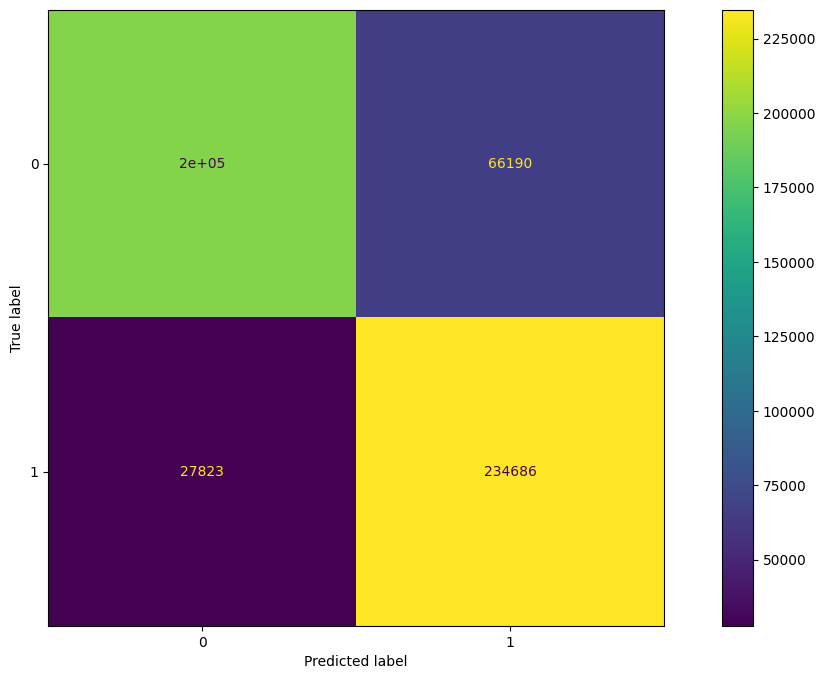

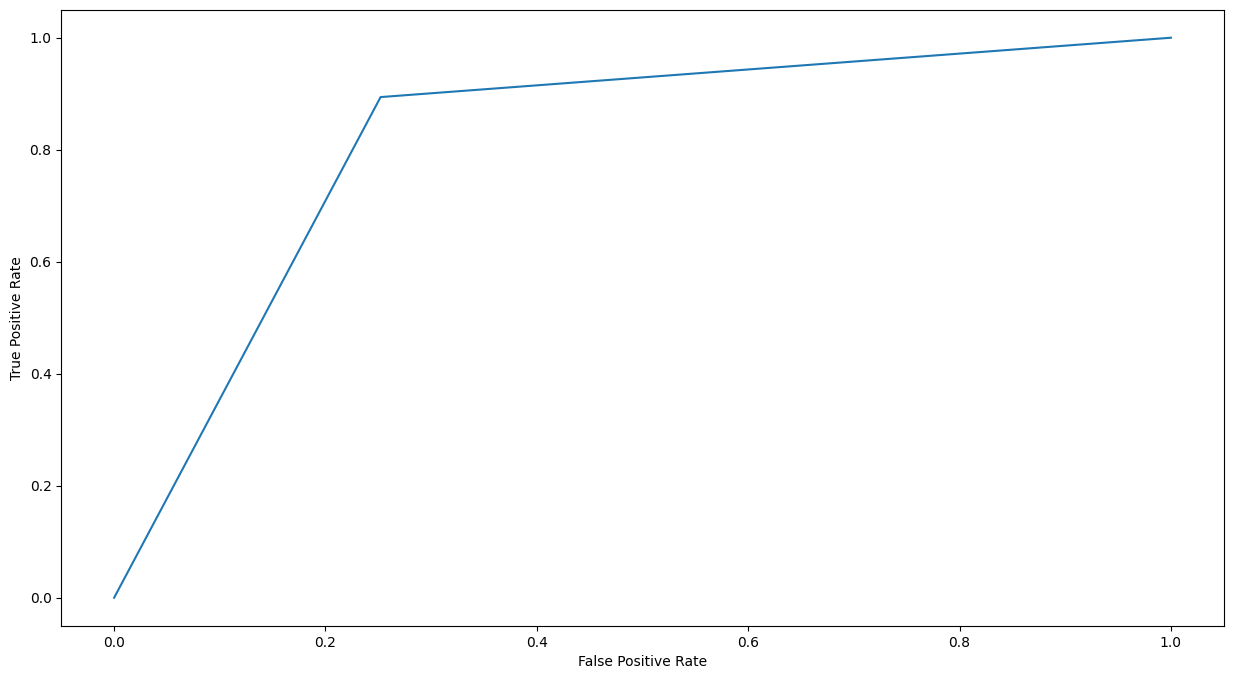



Logistic Regressor AUC score: 0.8209342387171021


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Decision Tree Model Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.78      0.84    262510
           1       0.81      0.91      0.86    262509

    accuracy                           0.85    525019
   macro avg       0.85      0.85      0.85    525019
weighted avg       0.85      0.85      0.85    525019
 

Decision Tree Confusion Matrix: 
         0       1
0  205605   56905
1   22654  239855 



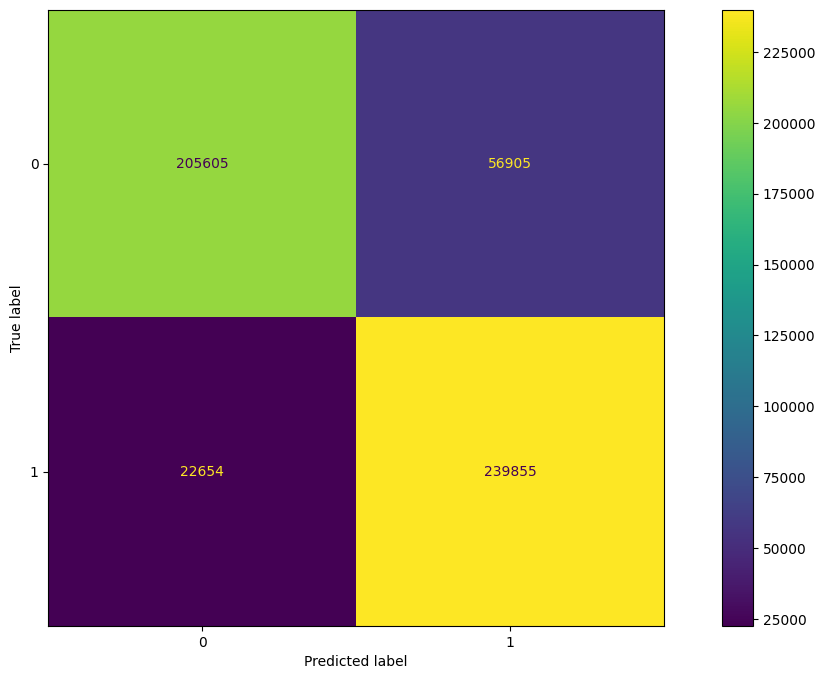

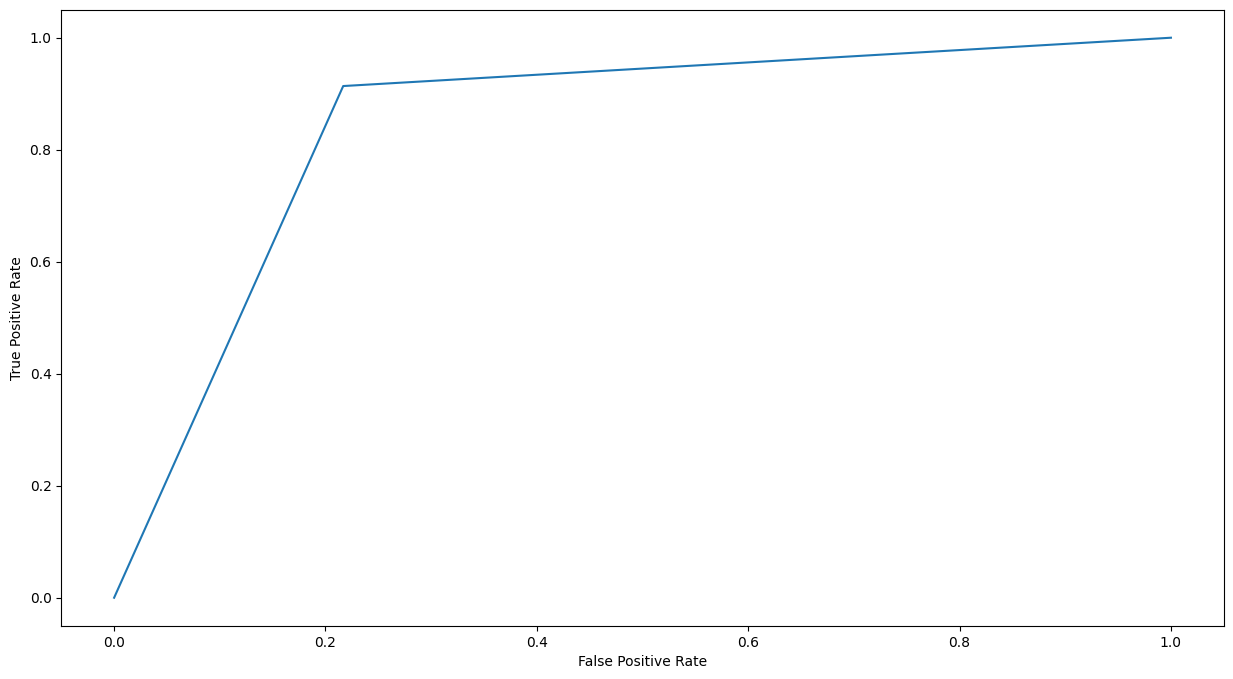



Decision Tree AUC score: 0.8484646560169258


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Random Forest Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86    262510
           1       0.84      0.92      0.88    262509

    accuracy                           0.87    525019
   macro avg       0.87      0.87      0.87    525019
weighted avg       0.87      0.87      0.87    525019
 

Random Forest Confusion Matrix: 
         0       1
0  215269   47241
1   21448  241061 



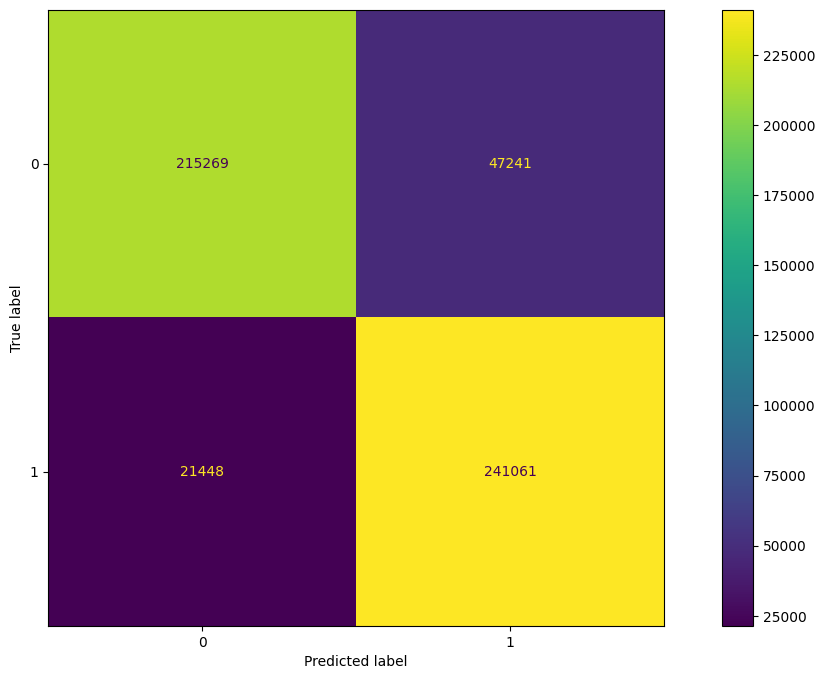

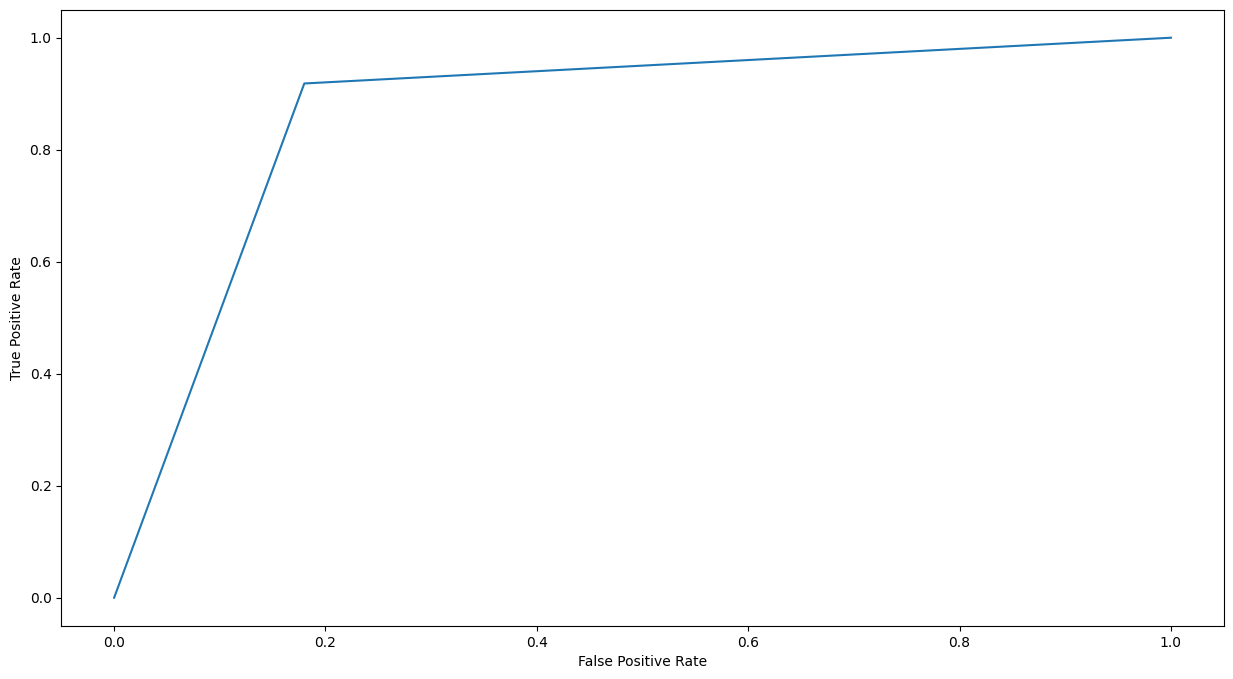



Random Forest AUC score: 0.8691686379492869


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87    262510
           1       0.84      0.92      0.88    262509

    accuracy                           0.87    525019
   macro avg       0.88      0.87      0.87    525019
weighted avg       0.88      0.87      0.87    525019
 

XGBoost Confusion Matrix: 
         0       1
0  216395   46115
1   19899  242610 



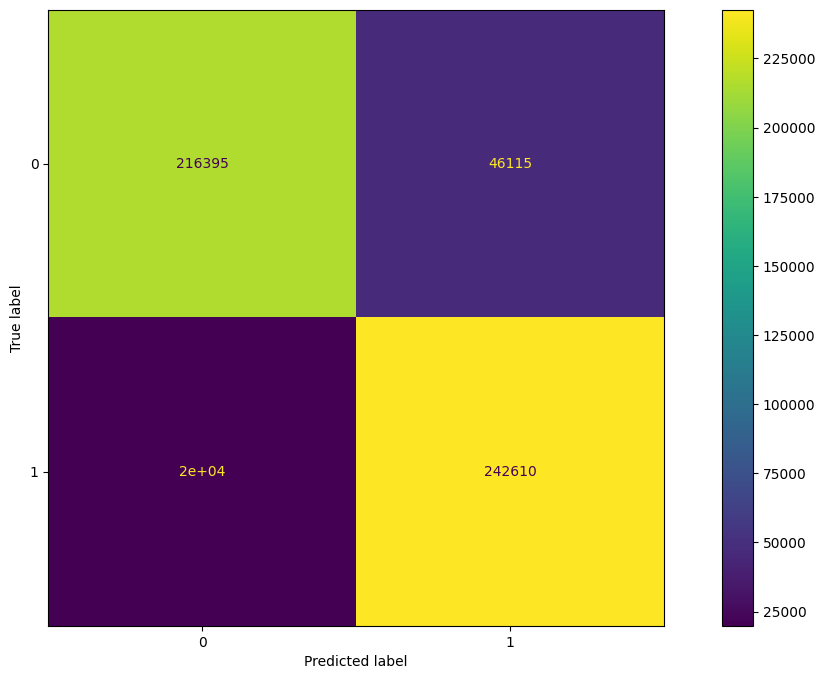

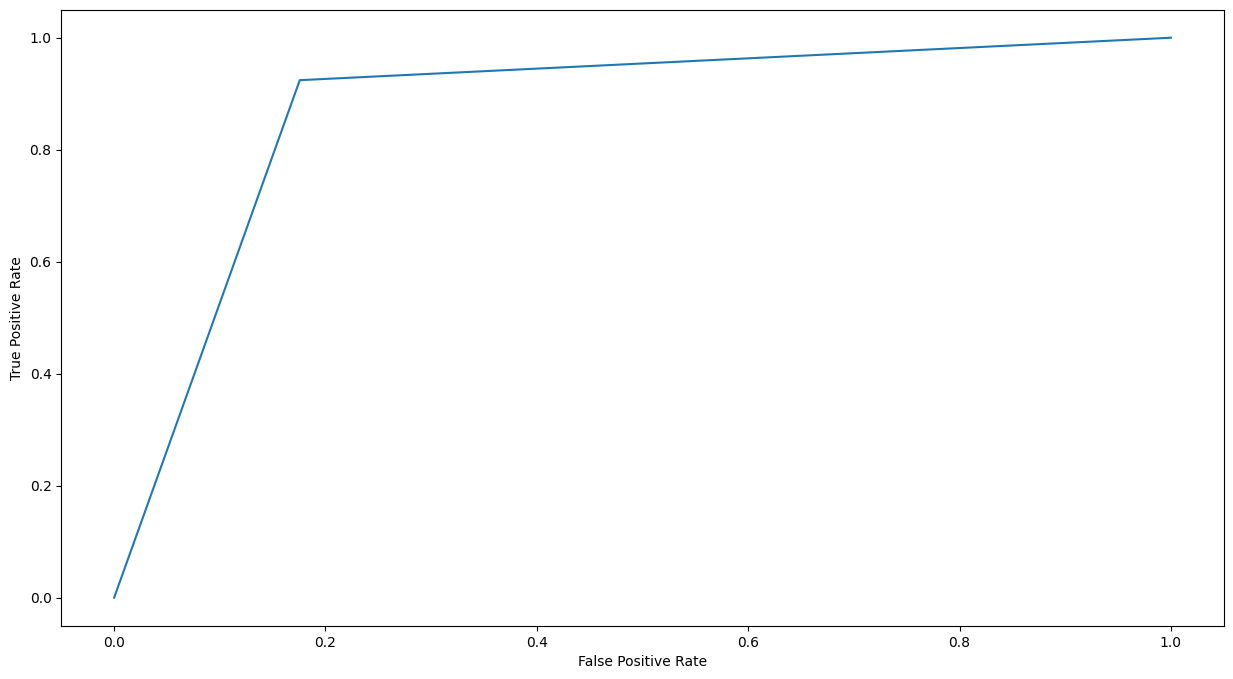



XGBoost AUC score: 0.8742636931867066


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


Learning rate set to 0.214573
0:	learn: 0.5674596	total: 288ms	remaining: 4m 47s
100:	learn: 0.3131181	total: 32.3s	remaining: 4m 47s
200:	learn: 0.3038396	total: 1m 4s	remaining: 4m 15s
300:	learn: 0.2999469	total: 1m 35s	remaining: 3m 41s
400:	learn: 0.2974894	total: 2m 7s	remaining: 3m 9s
500:	learn: 0.2958961	total: 2m 37s	remaining: 2m 37s
600:	learn: 0.2946402	total: 3m 8s	remaining: 2m 5s
700:	learn: 0.2937002	total: 3m 40s	remaining: 1m 34s
800:	learn: 0.2928137	total: 4m 12s	remaining: 1m 2s
900:	learn: 0.2920098	total: 4m 43s	remaining: 31.2s
999:	learn: 0.2912194	total: 5m 15s	remaining: 0us
CatBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.83      0.87    262510
           1       0.84      0.93      0.88    262

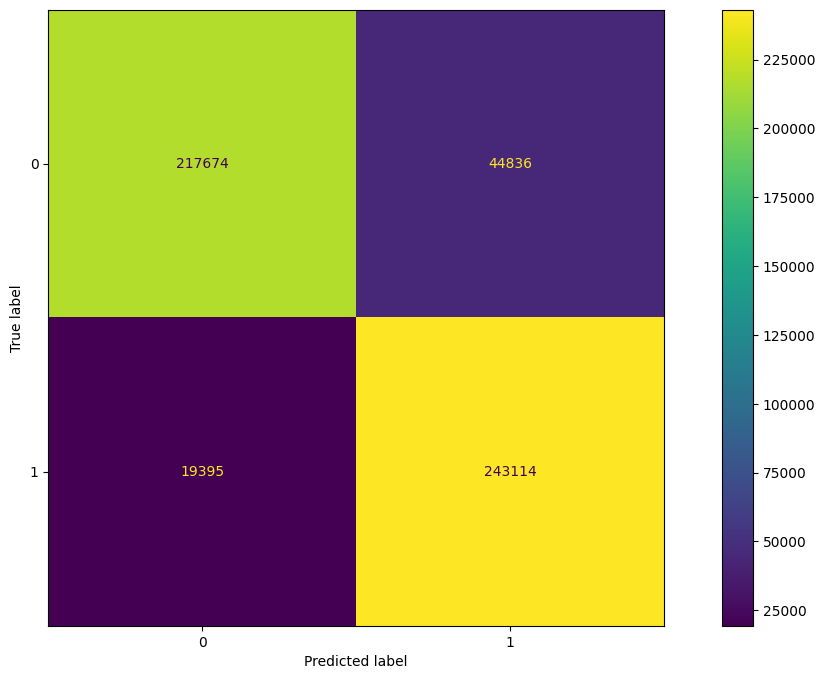

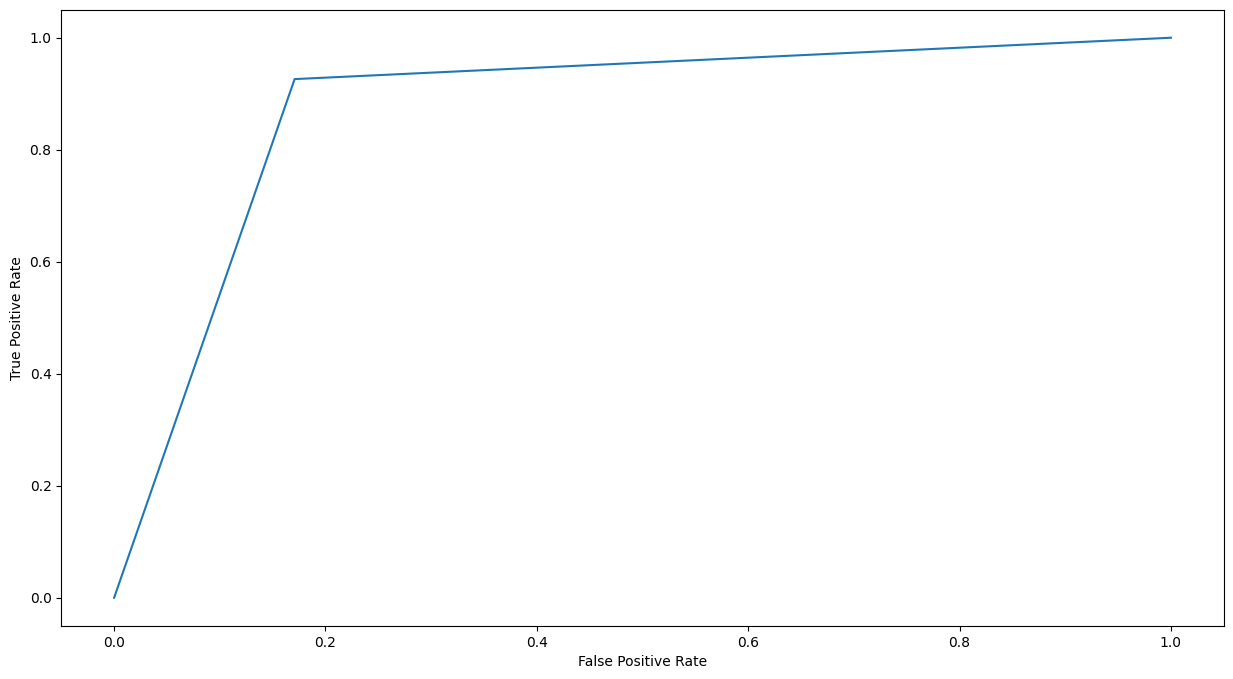



CatBoost AUC score: 0.8776597579460188


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86    262510
           1       0.83      0.92      0.87    262509

    accuracy                           0.87    525019
   macro avg       0.87      0.87      0.87    525019
weighted avg       0.87      0.87      0.87    525019
 

LightGBM Confusion Matrix: 
         0       1
0  214342   48168
1   21226  241283 



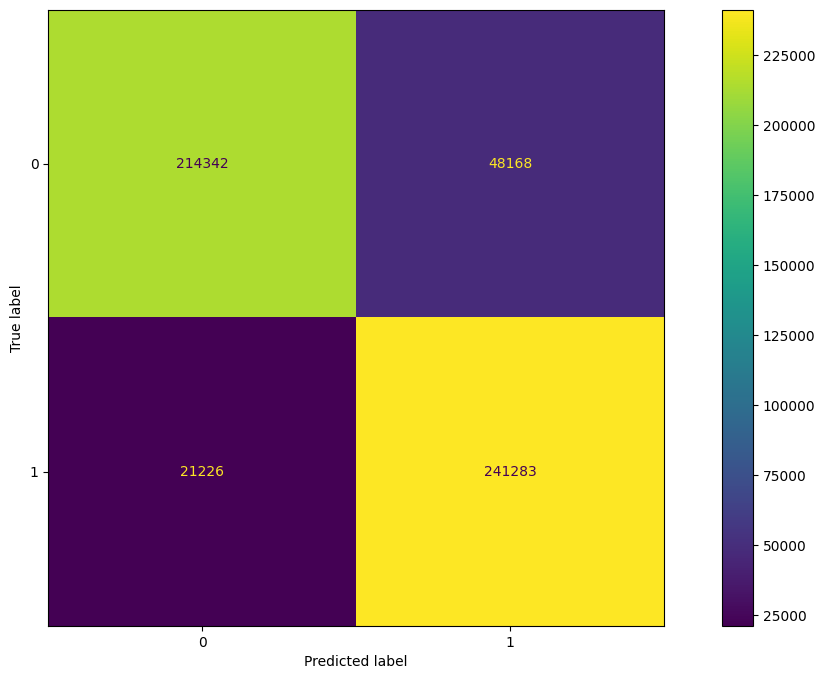

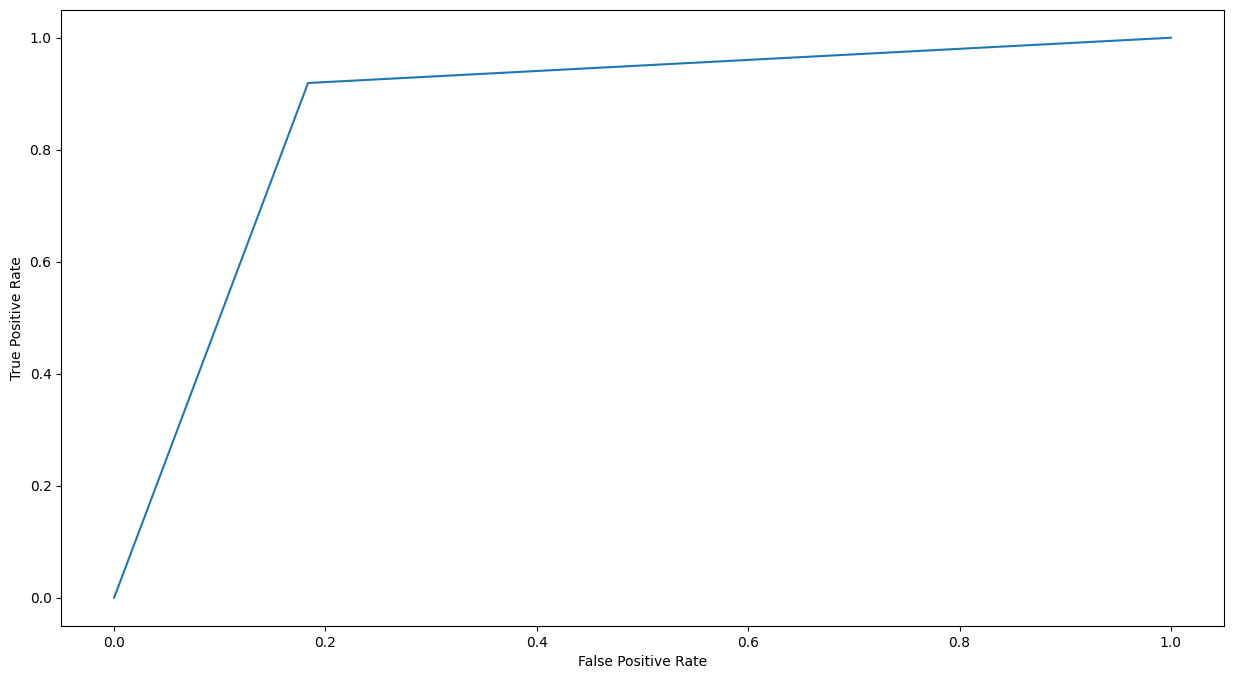



LightGBM AUC score: 0.8678258335717113


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


ada_boost Model Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.81      0.83    262510
           1       0.82      0.85      0.83    262509

    accuracy                           0.83    525019
   macro avg       0.83      0.83      0.83    525019
weighted avg       0.83      0.83      0.83    525019
 

ada_boost Confusion Matrix: 
         0       1
0  212833   49677
1   39978  222531 



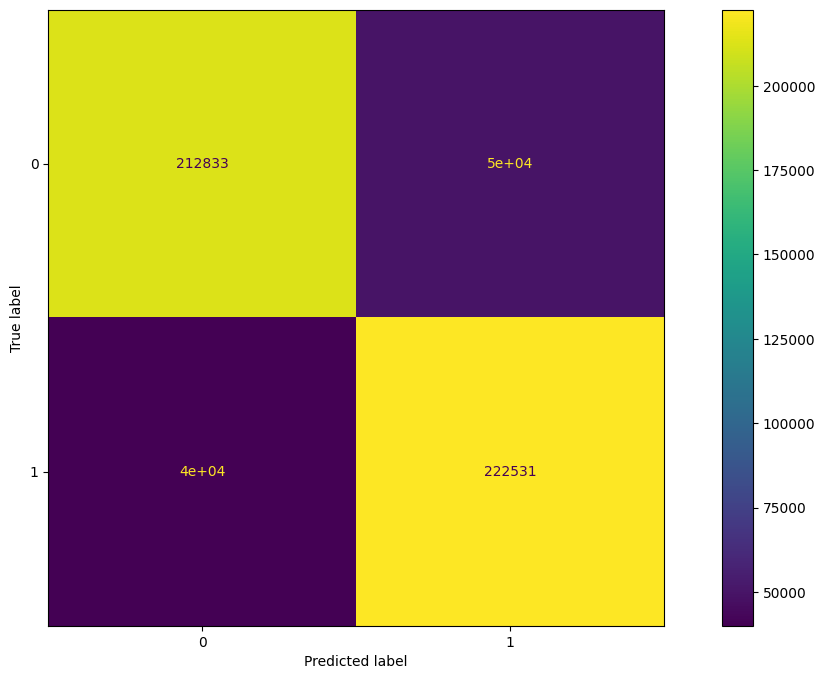

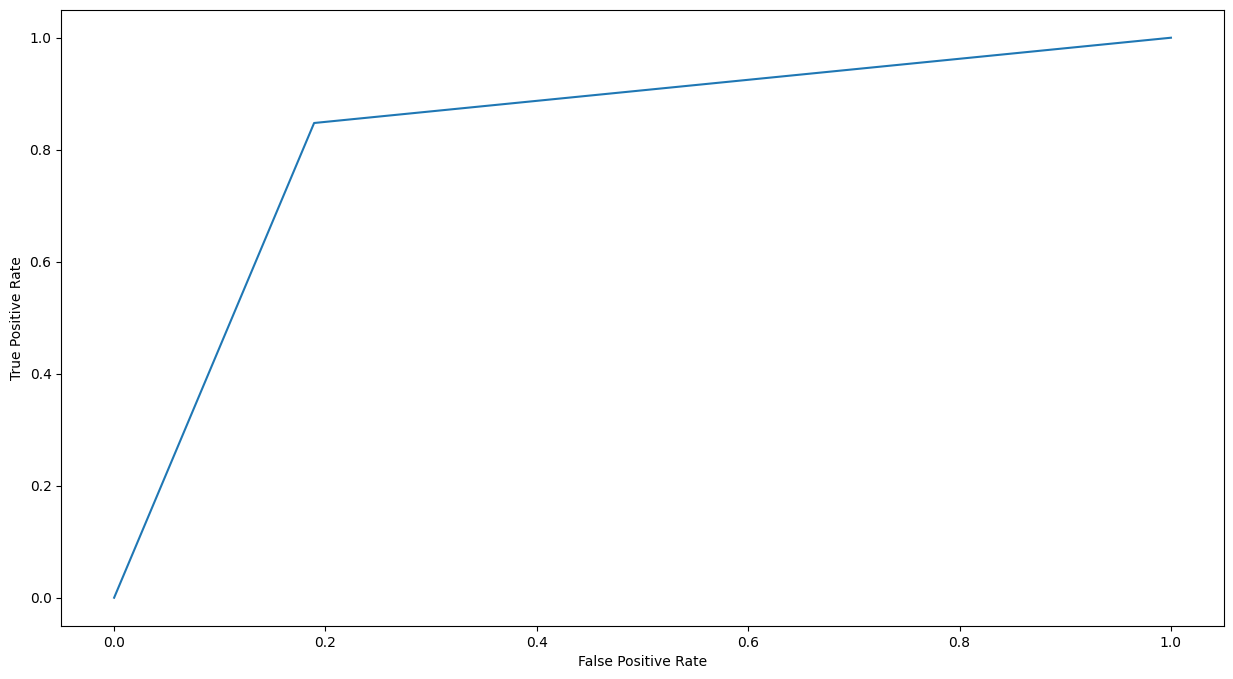



ada_boost AUC score: 0.8292347866901806


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 


----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- 




,precision,recall,f1_score,accuracy,auc
model,,,,,
CatBoost,0.844292,0.926117,0.883314,0.877660,0.877660
XGBoost,0.840281,0.924197,0.880243,0.874264,0.874264
Random Forest,0.836141,0.918296,0.875295,0.869169,0.869169
LightGBM,0.833588,0.919142,0.874277,0.867826,0.867826
Decision Tree,0.808246,0.913702,0.857745,0.848465,0.848465
ada_boost,0.817504,0.847708,0.832332,0.829235,0.829235
Logistic Regressor,0.780009,0.894011,0.833128,0.820934,0.820934


In [54]:
# Fit and evaluate the models
from sklearn import metrics
from sklearn.metrics import *
model_performances = classification_fit_and_score(smote_models)
model_performances

# creating a pipeline

In [55]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()



In [ ]:
train = Train.copy()

In [58]:

categorical_features = ['TENURE']
 # Pipeline for the Categorical features
encoder_categories = [ train[categorical_features[i] ].append( test[categorical_features[i] ] ).dropna().unique() for i in range(len(categorical_features) )]

categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = "most_frequent"
          )),
        ('ohe', preprocessing.OneHotEncoder(categories=encoder_categories,handle_unknown = 'ignore',drop='first', sparse=False))
    ]
)

In [59]:


# pipeline for numerical features
numeric_features =['MONTANT', 'FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','ON_NET','ORANGE','REGULARITY','FREQ_TOP_PACK']
numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'mean')),
        ('scaler',  MinMaxScaler())
    ]
)

In [60]:
# Associate the two pipelines
preprocessor = ColumnTransformer(
    [
          ("num", numeric_transformer, selector(dtype_include="number")),
         ("cat", categorical_transformer, selector(dtype_exclude="number")),
    ],
    
)

In [61]:
# putting the preprocessiong workflow in a pipeline
pipe1 = Pipeline(
    steps=[("preprocessor", preprocessor), ("estimator", catb_model)]
)

In [62]:
pipe1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d21380760>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(categories=[array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d21380220>)])),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f6d3679d340>)])

In [63]:
#fit on unbalanced dataset
X = Train.drop(['CHURN'], axis=1)
y = Train.CHURN

pipe1.fit(X,y)

Learning rate set to 0.203093
0:	learn: 0.5010013	total: 281ms	remaining: 4m 40s
100:	learn: 0.2937118	total: 34.4s	remaining: 5m 6s
200:	learn: 0.2925811	total: 1m 3s	remaining: 4m 12s
300:	learn: 0.2917103	total: 1m 32s	remaining: 3m 35s
400:	learn: 0.2909136	total: 1m 58s	remaining: 2m 57s
500:	learn: 0.2902406	total: 2m 28s	remaining: 2m 27s
600:	learn: 0.2896836	total: 2m 56s	remaining: 1m 57s
700:	learn: 0.2890697	total: 3m 25s	remaining: 1m 27s
800:	learn: 0.2884580	total: 3m 52s	remaining: 57.6s
900:	learn: 0.2879351	total: 4m 20s	remaining: 28.6s
999:	learn: 0.2874068	total: 4m 49s	remaining: 0us


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d21380760>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(categories=[array(['K > 24 month', 'E 6-9 month', 'H 15-18 month', 'G 12-15 month',
       'I 18-21 month', 'J 21-24 month', 'F 9-12 month', 'D 3-6 month'],
      dtype=object)],
                                                                                 drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d21380220>)])),
                ('estimator',
                 <catboost.core.CatBoostClassifier object at 0x7f6d3679d340>)])

Applying the chosen model on the test dataset

In [65]:
test_pred = pipe1.predict(Test)

### Getting the same prediction format as the sample_submission file

In [66]:
submission.head()

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,0
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0


In [67]:
#prediction
submission['CHURN'] = test_pred
submission['CHURN']

0         0
1         1
2         0
3         0
4         0
         ..
190058    0
190059    0
190060    1
190061    0
190062    1
Name: CHURN, Length: 190063, dtype: int64

In [68]:
# Making the user_id a dataframe
Passe= submission['user_id']
pass_df=  pd.DataFrame(Passe)
pass_df

,user_id
0,51fe4c3347db1f8571d18ac03f716c41acee30a4
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e
2,5a4db591c953a8d8f373877fad37aaf4268899a1
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df
...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0


In [69]:
prediction = submission['CHURN'] 


In [70]:
prediction

0         0
1         1
2         0
3         0
4         0
         ..
190058    0
190059    0
190060    1
190061    0
190062    1
Name: CHURN, Length: 190063, dtype: int64

In [71]:
#dataframe for predictions
sub=pd.DataFrame(prediction)
sub

,CHURN
0,0
1,1
2,0
3,0
4,0
...,...
190058,0
190059,0
190060,1
190061,0


In [72]:
# joining the user_id with the prediction
final_sub = pass_df.join(sub,how = 'left')
final_sub

,user_id,CHURN
0,51fe4c3347db1f8571d18ac03f716c41acee30a4,0
1,5ad5d67c175bce107cc97b98c4e37dcc38aa7f3e,1
2,5a4db591c953a8d8f373877fad37aaf4268899a1,0
3,8bf9b4d8880aeba1c9a0da48be78f12e629be37c,0
4,c7cdf2af01e9fa95bf498b68c122aa4b9a8d10df,0
...,...,...
190058,1092956a3dad77ceb7e8d7c70e3e13f77b60e2aa,0
190059,bec10becca7faa8e9cab9981b3aee5e9a7f04828,0
190060,7ac6fc191f8732b1b146e57f9ede983626b93eae,1
190061,d592c81971d6120b0d19f9ace85f278ea21b89a0,0


In [73]:
#saving our final predictions
final_sub.to_csv("predicted3_sub.csv", index=False)

# EXPORTING MODEL

In [74]:
ml = {'pipeline':pipe,
      'numeric_columns': numeric_features,
      'categorical_columns': categorical_features,}

In [75]:
import pickle
with open("ml_comps.pkl", 'wb') as file:
    pickle.dump(ml, file)

In [76]:
with open('ml_comps.pkl', 'rb') as file:
    loaded_object = pickle.load(file)

In [77]:
 loaded_object

{'pipeline': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('num',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7f6d211b1430>),
                                                  ('cat',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer(strategy='most_frequent')),
                                                                   ('encoder',
                                                                    OneHotEncoder(categories=[array([